In [1]:
pip install mne

     ---------------------------------------- 7.4/7.4 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 8.0/8.0 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 63.0/63.0 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 4.3 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 187.5/187.5 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp310-cp310-win_amd64.whl (376.9 MB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\amgad\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\keras\\src\\layers\\preprocessing\\normalization.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pandas

     ---------------------------------------- 11.6/11.6 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 505.5/505.5 kB 2.1 MB/s eta 0:00:00
     -------------------------------------- 345.4/345.4 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:

import os
import glob
import mne
import numpy as np
import scipy.io as sio
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import display

In [16]:

def convert_mat_to_fif(main_directory, input_folder_names, output_folder_names):
    """
    Convert .mat files in the input folders to .fif files and save them in the output folders.
    
    Parameters:
    - main_directory (str): Path to the main directory containing the input folders.
    - input_folder_names (list of str): List of input folder names.
    - output_folder_names (list of str): List of output folder names.
    """
    # Loop through each input folder
    for input_folder, output_folder in zip(input_folder_names, output_folder_names):
        # Get the full path of the current input folder
        input_folder_path = os.path.join(main_directory, input_folder)
        
        # Specify the output directory for .fif files
        output_directory_path = os.path.join(main_directory, output_folder)
        os.makedirs(output_directory_path, exist_ok=True)
        
        # Get a list of all .mat files in the current input folder
        mat_files = glob.glob(os.path.join(input_folder_path, '*.mat'))
        
        # Specify the channel types
        ch_types = ['eeg'] * 19
        ch_names = ['EEG1', 'EEG2', 'EEG3', 'EEG4', 'EEG5', 'EEG6', 'EEG7', 'EEG8', 'EEG9', 'EEG10',
                    'EEG11', 'EEG12', 'EEG13', 'EEG14', 'EEG15', 'EEG16', 'EEG17', 'EEG18', 'EEG19']
        
        # Loop through each .mat file in the input folder
        for mat_file in mat_files:
            mat_contents = sio.loadmat(mat_file)
            electrode_data = np.array(mat_contents[os.path.splitext(os.path.basename(mat_file))[0]])
            data = [i for i in electrode_data.T]  # Transpose the data
    
            # Create info and RawArray
            raw_info = mne.create_info(ch_names=ch_names, sfreq=128, ch_types=ch_types)
            raw = mne.io.RawArray(data, info=raw_info)
    
            # Save the RawArray to a .fif file in the output directory
            output_filename = os.path.splitext(os.path.basename(mat_file))[0] + '.fif'
            output_filepath = os.path.join(output_directory_path, output_filename)
            raw.save(output_filepath, overwrite=True)
            print(f"Saved {output_filepath}")
    
    print("Processing complete!")

# Specify the main directory containing the input folders
main_directory = r'E:\klara\signal project'

# Specify the input folder names
input_folder_names = ['ADHD_part2', 'ADHD_part1', 'Control_part1', 'Control_part2']

# Specify the output folder names
output_folder_names = ['ADHD_part2_fif', 'ADHD_part1_fif', 'Control_part1_fif', 'Control_part2_fif']

# Call the function
convert_mat_to_fif(main_directory, input_folder_names, output_folder_names)


Creating RawArray with float64 data, n_channels=19, n_times=16697
    Range : 0 ... 16696 =      0.000 ...   130.438 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v177.fif
Closing E:\klara\signal project\ADHD_part2_fif\v177.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v177.fif
Creating RawArray with float64 data, n_channels=19, n_times=12673
    Range : 0 ... 12672 =      0.000 ...    99.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v179.fif
Closing E:\klara\signal project\ADHD_part2_fif\v179.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v179.fif
Creating RawArray with float64 data, n_channels=19, n_times=10668
    Range : 0 ... 10667 =      0.000 ...    83.336 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v181.fif
Closing E:\klara\signal project\ADHD_part2_fif\v181.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v181.fif
Creating RawA

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v177.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v179.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v181.fif) does not conform 

[done]
Saved E:\klara\signal project\ADHD_part2_fif\v183.fif
Creating RawArray with float64 data, n_channels=19, n_times=15465
    Range : 0 ... 15464 =      0.000 ...   120.812 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v190.fif
Closing E:\klara\signal project\ADHD_part2_fif\v190.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v190.fif
Creating RawArray with float64 data, n_channels=19, n_times=13395
    Range : 0 ... 13394 =      0.000 ...   104.641 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v196.fif
Closing E:\klara\signal project\ADHD_part2_fif\v196.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v196.fif
Creating RawArray with float64 data, n_channels=19, n_times=19621
    Range : 0 ... 19620 =      0.000 ...   153.281 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v198.fif
Closing E:\klara\signal project\ADHD_part2_fif\v198.fif
[done]
Saved 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v190.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v196.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v198.fif) does not conform 

Creating RawArray with float64 data, n_channels=19, n_times=12739
    Range : 0 ... 12738 =      0.000 ...    99.516 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v200.fif
Closing E:\klara\signal project\ADHD_part2_fif\v200.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v200.fif
Creating RawArray with float64 data, n_channels=19, n_times=20456
    Range : 0 ... 20455 =      0.000 ...   159.805 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v204.fif
Closing E:\klara\signal project\ADHD_part2_fif\v204.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v204.fif
Creating RawArray with float64 data, n_channels=19, n_times=20173
    Range : 0 ... 20172 =      0.000 ...   157.594 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v206.fif
Closing E:\klara\signal project\ADHD_part2_fif\v206.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v206.fif
Creating RawA

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v200.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v204.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v206.fif) does not conform 

Closing E:\klara\signal project\ADHD_part2_fif\v209.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v209.fif
Creating RawArray with float64 data, n_channels=19, n_times=12353
    Range : 0 ... 12352 =      0.000 ...    96.500 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v213.fif
Closing E:\klara\signal project\ADHD_part2_fif\v213.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v213.fif
Creating RawArray with float64 data, n_channels=19, n_times=21372
    Range : 0 ... 21371 =      0.000 ...   166.961 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v215.fif
Closing E:\klara\signal project\ADHD_part2_fif\v215.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v215.fif
Creating RawArray with float64 data, n_channels=19, n_times=27157
    Range : 0 ... 27156 =      0.000 ...   212.156 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v219.fif
Closing E:\kl

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v213.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v215.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v219.fif) does not conform 

Writing E:\klara\signal project\ADHD_part2_fif\v227.fif
Closing E:\klara\signal project\ADHD_part2_fif\v227.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v227.fif
Creating RawArray with float64 data, n_channels=19, n_times=19713
    Range : 0 ... 19712 =      0.000 ...   154.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v231.fif
Closing E:\klara\signal project\ADHD_part2_fif\v231.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v231.fif
Creating RawArray with float64 data, n_channels=19, n_times=34191
    Range : 0 ... 34190 =      0.000 ...   267.109 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v234.fif
Closing E:\klara\signal project\ADHD_part2_fif\v234.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v234.fif
Creating RawArray with float64 data, n_channels=19, n_times=13502
    Range : 0 ... 13501 =      0.000 ...   105.477 secs
Ready.
Overwriting existing file.
Writing E:\kl

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v231.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v234.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v236.fif) does not conform 

[done]
Saved E:\klara\signal project\ADHD_part2_fif\v238.fif
Creating RawArray with float64 data, n_channels=19, n_times=39030
    Range : 0 ... 39029 =      0.000 ...   304.914 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v244.fif
Closing E:\klara\signal project\ADHD_part2_fif\v244.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v244.fif
Creating RawArray with float64 data, n_channels=19, n_times=21307
    Range : 0 ... 21306 =      0.000 ...   166.453 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v246.fif
Closing E:\klara\signal project\ADHD_part2_fif\v246.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v246.fif
Creating RawArray with float64 data, n_channels=19, n_times=13853
    Range : 0 ... 13852 =      0.000 ...   108.219 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v250.fif
Closing E:\klara\signal project\ADHD_part2_fif\v250.fif
[done]
Saved 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v244.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v246.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v250.fif) does not conform 

[done]
Saved E:\klara\signal project\ADHD_part2_fif\v254.fif
Creating RawArray with float64 data, n_channels=19, n_times=18657
    Range : 0 ... 18656 =      0.000 ...   145.750 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v263.fif
Closing E:\klara\signal project\ADHD_part2_fif\v263.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v263.fif
Creating RawArray with float64 data, n_channels=19, n_times=18389
    Range : 0 ... 18388 =      0.000 ...   143.656 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v265.fif
Closing E:\klara\signal project\ADHD_part2_fif\v265.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v265.fif
Creating RawArray with float64 data, n_channels=19, n_times=23681
    Range : 0 ... 23680 =      0.000 ...   185.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v270.fif
Closing E:\klara\signal project\ADHD_part2_fif\v270.fif
[done]
Saved 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v263.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v265.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v270.fif) does not conform 

    Range : 0 ... 20133 =      0.000 ...   157.289 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v279.fif
Closing E:\klara\signal project\ADHD_part2_fif\v279.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v279.fif
Creating RawArray with float64 data, n_channels=19, n_times=15383
    Range : 0 ... 15382 =      0.000 ...   120.172 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v284.fif
Closing E:\klara\signal project\ADHD_part2_fif\v284.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v284.fif
Creating RawArray with float64 data, n_channels=19, n_times=11465
    Range : 0 ... 11464 =      0.000 ...    89.562 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part2_fif\v286.fif
Closing E:\klara\signal project\ADHD_part2_fif\v286.fif
[done]
Saved E:\klara\signal project\ADHD_part2_fif\v286.fif
Creating RawArray with float64 data, n_channels=19, n_times=20115
    Range : 0

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v279.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v284.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v286.fif) does not conform 

    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v10p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v10p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v10p.fif
Creating RawArray with float64 data, n_channels=19, n_times=17604
    Range : 0 ... 17603 =      0.000 ...   137.523 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v12p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v12p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v12p.fif
Creating RawArray with float64 data, n_channels=19, n_times=17562
    Range : 0 ... 17561 =      0.000 ...   137.195 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v14p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v14p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v14p.fif
Creating RawArray with float64 data, n_channels=19, n_times=43252
    Range : 0

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v10p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v12p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v14p.fif) does not conform 

Closing E:\klara\signal project\ADHD_part1_fif\v15p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v15p.fif
Creating RawArray with float64 data, n_channels=19, n_times=24241
    Range : 0 ... 24240 =      0.000 ...   189.375 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v173.fif
Closing E:\klara\signal project\ADHD_part1_fif\v173.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v173.fif
Creating RawArray with float64 data, n_channels=19, n_times=25003
    Range : 0 ... 25002 =      0.000 ...   195.328 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v18p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v18p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v18p.fif
Creating RawArray with float64 data, n_channels=19, n_times=23063
    Range : 0 ... 23062 =      0.000 ...   180.172 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v19p.fif
Closing E:\kl

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v173.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v18p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v19p.fif) does not conform 

    Range : 0 ... 35327 =      0.000 ...   275.992 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v20p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v20p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v20p.fif
Creating RawArray with float64 data, n_channels=19, n_times=16574
    Range : 0 ... 16573 =      0.000 ...   129.477 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v21p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v21p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v21p.fif
Creating RawArray with float64 data, n_channels=19, n_times=12100
    Range : 0 ... 12099 =      0.000 ...    94.523 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v22p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v22p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v22p.fif
Creating RawArray with float64 data, n_channels=19, n_times=16385
    Range : 0

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v20p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v21p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v22p.fif) does not conform 

Saved E:\klara\signal project\ADHD_part1_fif\v24p.fif
Creating RawArray with float64 data, n_channels=19, n_times=9894
    Range : 0 ... 9893 =      0.000 ...    77.289 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v25p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v25p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v25p.fif
Creating RawArray with float64 data, n_channels=19, n_times=28880
    Range : 0 ... 28879 =      0.000 ...   225.617 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v27p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v27p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v27p.fif
Creating RawArray with float64 data, n_channels=19, n_times=27612
    Range : 0 ... 27611 =      0.000 ...   215.711 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v28p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v28p.fif


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v25p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v27p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v28p.fif) does not conform 

[done]
Saved E:\klara\signal project\ADHD_part1_fif\v28p.fif
Creating RawArray with float64 data, n_channels=19, n_times=24193
    Range : 0 ... 24192 =      0.000 ...   189.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v29p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v29p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v29p.fif
Creating RawArray with float64 data, n_channels=19, n_times=21663
    Range : 0 ... 21662 =      0.000 ...   169.234 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v30p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v30p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v30p.fif
Creating RawArray with float64 data, n_channels=19, n_times=11679
    Range : 0 ... 11678 =      0.000 ...    91.234 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v31p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v31p.fif
[done]
Saved 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v29p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v30p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v31p.fif) does not conform 

Creating RawArray with float64 data, n_channels=19, n_times=29217
    Range : 0 ... 29216 =      0.000 ...   228.250 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v33p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v33p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v33p.fif
Creating RawArray with float64 data, n_channels=19, n_times=19555
    Range : 0 ... 19554 =      0.000 ...   152.766 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v34p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v34p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v34p.fif
Creating RawArray with float64 data, n_channels=19, n_times=15305
    Range : 0 ... 15304 =      0.000 ...   119.562 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v35p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v35p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v35p.fif
Creating RawA

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v33p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v34p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v35p.fif) does not conform 

Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v37p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v37p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v37p.fif
Creating RawArray with float64 data, n_channels=19, n_times=24695
    Range : 0 ... 24694 =      0.000 ...   192.922 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v38p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v38p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v38p.fif
Creating RawArray with float64 data, n_channels=19, n_times=18177
    Range : 0 ... 18176 =      0.000 ...   142.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v39p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v39p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v39p.fif
Creating RawArray with float64 data, n_channels=19, n_times=33570
    Range : 0 ... 33569 =      0.000 ...   262.258 secs
Ready.
Overwriting e

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v37p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v38p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v39p.fif) does not conform 

[done]
Saved E:\klara\signal project\ADHD_part1_fif\v3p.fif
Creating RawArray with float64 data, n_channels=19, n_times=20097
    Range : 0 ... 20096 =      0.000 ...   157.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v40p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v40p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v40p.fif
Creating RawArray with float64 data, n_channels=19, n_times=17561
    Range : 0 ... 17560 =      0.000 ...   137.188 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v6p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v6p.fif
[done]
Saved E:\klara\signal project\ADHD_part1_fif\v6p.fif
Creating RawArray with float64 data, n_channels=19, n_times=15776
    Range : 0 ... 15775 =      0.000 ...   123.242 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\ADHD_part1_fif\v8p.fif
Closing E:\klara\signal project\ADHD_part1_fif\v8p.fif
[done]
Saved E:\kla

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v40p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v6p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v8p.fif) does not conform to

    Range : 0 ... 19025 =      0.000 ...   148.633 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v108.fif
Closing E:\klara\signal project\Control_part1_fif\v108.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v108.fif
Creating RawArray with float64 data, n_channels=19, n_times=16044
    Range : 0 ... 16043 =      0.000 ...   125.336 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v109.fif
Closing E:\klara\signal project\Control_part1_fif\v109.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v109.fif
Creating RawArray with float64 data, n_channels=19, n_times=16549
    Range : 0 ... 16548 =      0.000 ...   129.281 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v110.fif
Closing E:\klara\signal project\Control_part1_fif\v110.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v110.fif
Creating RawArray with float64 data, n_channels=19, 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v108.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v109.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v110.fif) does not

    Range : 0 ... 15942 =      0.000 ...   124.547 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v112.fif
Closing E:\klara\signal project\Control_part1_fif\v112.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v112.fif
Creating RawArray with float64 data, n_channels=19, n_times=15574
    Range : 0 ... 15573 =      0.000 ...   121.664 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v113.fif
Closing E:\klara\signal project\Control_part1_fif\v113.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v113.fif
Creating RawArray with float64 data, n_channels=19, n_times=13304
    Range : 0 ... 13303 =      0.000 ...   103.930 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v114.fif
Closing E:\klara\signal project\Control_part1_fif\v114.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v114.fif
Creating RawArray with float64 data, n_channels=19, 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v112.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v113.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v114.fif) does not

Closing E:\klara\signal project\Control_part1_fif\v115.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v115.fif
Creating RawArray with float64 data, n_channels=19, n_times=19301
    Range : 0 ... 19300 =      0.000 ...   150.781 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v116.fif
Closing E:\klara\signal project\Control_part1_fif\v116.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v116.fif
Creating RawArray with float64 data, n_channels=19, n_times=12500
    Range : 0 ... 12499 =      0.000 ...    97.648 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v41p.fif
Closing E:\klara\signal project\Control_part1_fif\v41p.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v41p.fif
Creating RawArray with float64 data, n_channels=19, n_times=16704
    Range : 0 ... 16703 =      0.000 ...   130.492 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v116.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v41p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v42p.fif) does not

[done]
Saved E:\klara\signal project\Control_part1_fif\v43p.fif
Creating RawArray with float64 data, n_channels=19, n_times=11393
    Range : 0 ... 11392 =      0.000 ...    89.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v44p.fif
Closing E:\klara\signal project\Control_part1_fif\v44p.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v44p.fif
Creating RawArray with float64 data, n_channels=19, n_times=10871
    Range : 0 ... 10870 =      0.000 ...    84.922 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v45p.fif
Closing E:\klara\signal project\Control_part1_fif\v45p.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v45p.fif
Creating RawArray with float64 data, n_channels=19, n_times=9823
    Range : 0 ... 9822 =      0.000 ...    76.734 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v46p.fif
Closing E:\klara\signal project\Control_part1_f

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v44p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v45p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v46p.fif) does not

[done]
Saved E:\klara\signal project\Control_part1_fif\v48p.fif
Creating RawArray with float64 data, n_channels=19, n_times=16769
    Range : 0 ... 16768 =      0.000 ...   131.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v49p.fif
Closing E:\klara\signal project\Control_part1_fif\v49p.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v49p.fif
Creating RawArray with float64 data, n_channels=19, n_times=16239
    Range : 0 ... 16238 =      0.000 ...   126.859 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v50p.fif
Closing E:\klara\signal project\Control_part1_fif\v50p.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v50p.fif
Creating RawArray with float64 data, n_channels=19, n_times=7983
    Range : 0 ... 7982 =      0.000 ...    62.359 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v51p.fif
Closing E:\klara\signal project\Control_part1_f

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v49p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v50p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v51p.fif) does not

[done]
Saved E:\klara\signal project\Control_part1_fif\v53p.fif
Creating RawArray with float64 data, n_channels=19, n_times=19234
    Range : 0 ... 19233 =      0.000 ...   150.258 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v54p.fif
Closing E:\klara\signal project\Control_part1_fif\v54p.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v54p.fif
Creating RawArray with float64 data, n_channels=19, n_times=14282
    Range : 0 ... 14281 =      0.000 ...   111.570 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v55p.fif
Closing E:\klara\signal project\Control_part1_fif\v55p.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v55p.fif
Creating RawArray with float64 data, n_channels=19, n_times=14139
    Range : 0 ... 14138 =      0.000 ...   110.453 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v56p.fif
Closing E:\klara\signal project\Control_part1

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v54p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v55p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v56p.fif) does not

Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v58p.fif
Closing E:\klara\signal project\Control_part1_fif\v58p.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v58p.fif
Creating RawArray with float64 data, n_channels=19, n_times=16513
    Range : 0 ... 16512 =      0.000 ...   129.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v59p.fif
Closing E:\klara\signal project\Control_part1_fif\v59p.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v59p.fif
Creating RawArray with float64 data, n_channels=19, n_times=12929
    Range : 0 ... 12928 =      0.000 ...   101.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part1_fif\v60p.fif
Closing E:\klara\signal project\Control_part1_fif\v60p.fif
[done]
Saved E:\klara\signal project\Control_part1_fif\v60p.fif
Creating RawArray with float64 data, n_channels=19, n_times=25659
    Range : 0 ... 25658 =      0.000 ...   200.45

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v58p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v59p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v60p.fif) does not

[done]
Saved E:\klara\signal project\Control_part2_fif\v118.fif
Creating RawArray with float64 data, n_channels=19, n_times=12033
    Range : 0 ... 12032 =      0.000 ...    94.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v120.fif
Closing E:\klara\signal project\Control_part2_fif\v120.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v120.fif
Creating RawArray with float64 data, n_channels=19, n_times=16377
    Range : 0 ... 16376 =      0.000 ...   127.938 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v121.fif
Closing E:\klara\signal project\Control_part2_fif\v121.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v121.fif
Creating RawArray with float64 data, n_channels=19, n_times=14550
    Range : 0 ... 14549 =      0.000 ...   113.664 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v123.fif
Closing E:\klara\signal project\Control_part2

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v120.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v121.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v123.fif) does not

[done]
Saved E:\klara\signal project\Control_part2_fif\v127.fif
Creating RawArray with float64 data, n_channels=19, n_times=11208
    Range : 0 ... 11207 =      0.000 ...    87.555 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v129.fif
Closing E:\klara\signal project\Control_part2_fif\v129.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v129.fif
Creating RawArray with float64 data, n_channels=19, n_times=16686
    Range : 0 ... 16685 =      0.000 ...   130.352 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v131.fif
Closing E:\klara\signal project\Control_part2_fif\v131.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v131.fif
Creating RawArray with float64 data, n_channels=19, n_times=15073
    Range : 0 ... 15072 =      0.000 ...   117.750 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v133.fif
Closing E:\klara\signal project\Control_part2

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v129.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v131.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v133.fif) does not

[done]
Saved E:\klara\signal project\Control_part2_fif\v138.fif
Creating RawArray with float64 data, n_channels=19, n_times=17187
    Range : 0 ... 17186 =      0.000 ...   134.266 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v140.fif
Closing E:\klara\signal project\Control_part2_fif\v140.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v140.fif
Creating RawArray with float64 data, n_channels=19, n_times=15607
    Range : 0 ... 15606 =      0.000 ...   121.922 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v143.fif
Closing E:\klara\signal project\Control_part2_fif\v143.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v143.fif
Creating RawArray with float64 data, n_channels=19, n_times=14209
    Range : 0 ... 14208 =      0.000 ...   111.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v147.fif
Closing E:\klara\signal project\Control_part2

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v140.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v143.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v147.fif) does not

    Range : 0 ... 20913 =      0.000 ...   163.383 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v151.fif
Closing E:\klara\signal project\Control_part2_fif\v151.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v151.fif
Creating RawArray with float64 data, n_channels=19, n_times=13697
    Range : 0 ... 13696 =      0.000 ...   107.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v297.fif
Closing E:\klara\signal project\Control_part2_fif\v297.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v297.fif
Creating RawArray with float64 data, n_channels=19, n_times=17782
    Range : 0 ... 17781 =      0.000 ...   138.914 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v298.fif
Closing E:\klara\signal project\Control_part2_fif\v298.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v298.fif
Creating RawArray with float64 data, n_channels=19, 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v151.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v297.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v298.fif) does not

    Range : 0 ... 25984 =      0.000 ...   203.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v300.fif
Closing E:\klara\signal project\Control_part2_fif\v300.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v300.fif
Creating RawArray with float64 data, n_channels=19, n_times=17841
    Range : 0 ... 17840 =      0.000 ...   139.375 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v302.fif
Closing E:\klara\signal project\Control_part2_fif\v302.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v302.fif
Creating RawArray with float64 data, n_channels=19, n_times=19222
    Range : 0 ... 19221 =      0.000 ...   150.164 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v303.fif
Closing E:\klara\signal project\Control_part2_fif\v303.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v303.fif
Creating RawArray with float64 data, n_channels=19, 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v300.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v302.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v303.fif) does not

    Range : 0 ... 22272 =      0.000 ...   174.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v305.fif
Closing E:\klara\signal project\Control_part2_fif\v305.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v305.fif
Creating RawArray with float64 data, n_channels=19, n_times=18301
    Range : 0 ... 18300 =      0.000 ...   142.969 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v306.fif
Closing E:\klara\signal project\Control_part2_fif\v306.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v306.fif
Creating RawArray with float64 data, n_channels=19, n_times=22807
    Range : 0 ... 22806 =      0.000 ...   178.172 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v307.fif
Closing E:\klara\signal project\Control_part2_fif\v307.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v307.fif
Creating RawArray with float64 data, n_channels=19, 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v305.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v306.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v307.fif) does not

Writing E:\klara\signal project\Control_part2_fif\v309.fif
Closing E:\klara\signal project\Control_part2_fif\v309.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v309.fif
Creating RawArray with float64 data, n_channels=19, n_times=17793
    Range : 0 ... 17792 =      0.000 ...   139.000 secs
Ready.
Overwriting existing file.
Writing E:\klara\signal project\Control_part2_fif\v310.fif
Closing E:\klara\signal project\Control_part2_fif\v310.fif
[done]
Saved E:\klara\signal project\Control_part2_fif\v310.fif
Processing complete!


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2166075121.py:40: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v310.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_filepath, overwrite=True)


In [17]:
#convert_mat_to_fif(main_directory, input_folder_names, output_folder_names)
#filtered_data = raw.copy()

def apply_highpass_filter(raw, cutoff_freq):
    """
    Apply a high-pass filter to EEG data.
    
    Parameters:
    - raw_data (mne.io.RawArray): Raw EEG data.
    - cutoff_freq (float): Cutoff frequency in Hz.
    
    Returns:
    - filtered_data (mne.io.RawArray): Filtered EEG data.
    """
    # Copy the raw data to avoid modifying the original
    filtered_data = raw.copy()
    
    # Apply the high-pass filter
    filtered_data.filter(l_freq=cutoff_freq, h_freq=None, fir_design='firwin', phase='zero-double')
    
    return filtered_data


def apply_notch_filter(filtered_raw,fnotch):
    
    # Copy the raw data to avoid modifying the original
    #filtered_data = raw.copy()
    
    # Apply the notch filter
    filtered_raw.notch_filter(freqs=fnotch, picks=None, fir_design='firwin', phase='zero')
    return filtered_raw

#from mne.filter import filter_data

def apply_bandpass_filter(filtered_raw, lowcut, highcut, fs, order=5):
    
    #filtered_data = raw.copy()
    
    filtered_raw.filter(l_freq=lowcut, h_freq=highcut, picks=None, filter_length='auto', l_trans_bandwidth='auto', h_trans_bandwidth='auto',
                          n_jobs=1, method='fir', iir_params=None, phase='zero', fir_window='hamming',
                          fir_design='firwin', pad='reflect_limited', verbose=None)
    
    return filtered_raw
#def apply_car_spatial_filter(raw):
    
    # Copy the raw data to avoid modifying the original
    #filtered_data = raw.copy().set_eeg_reference('average', projection=True)
    # Apply the projection to actually re-reference the data
    #filtered_data.apply_proj()
    
    #return filtered_data
#def apply_zero_padded(filtered_raw, n_zeros):
    #zero_padding = np.zeros(n_zeros)
    #data = filtered_raw.get_data()
    #info = filtered_raw.info  # Get the info attribute before modifying filtered_raw
    
    # Create a new array to hold the padded data
    #padded_data = np.zeros((data.shape[0], data.shape[1] + 2 * n_zeros))

    # Iterate over each channel and apply zero-padding
    #for ch_idx in range(data.shape[0]):
        #channel_data = data[ch_idx]
        #channel_padded = np.concatenate((zero_padding, channel_data, zero_padding))
        #padded_data[ch_idx] = channel_padded

    # Create a new RawArray object with the modified data
    #filtered_raw = mne.io.RawArray(padded_data, info)
    
    #return padded_data, filtered_raw

#def apply_rolling_mean(filtered_raw, window_size):

    # Iterate over each channel
    #for i in range(len(filtered_raw.ch_names)):
        # Get the data for the current channel
        #data = filtered_raw.get_data()[i]

        # Calculate the rolling mean
        #moving_avg = pd.Series(data).rolling(window=window_size, min_periods=1).mean()

        # Replace NaNs in the rolling mean with zeros
        #moving_avg = moving_avg.fillna(0)

        # Update the data in the Raw object with the rolling mean
        #filtered_raw._data[i] = moving_avg.values
        
        #return filtered_raw


In [18]:
def filters(main_directory, input_folder_names, output_folder_names):
    for input_folder, output_folder in zip(input_folder_names, output_folder_names):
        input_folder_path = os.path.join(main_directory, input_folder)
        output_directory_path = os.path.join(main_directory, output_folder)
        os.makedirs(output_directory_path, exist_ok=True)
        fif_files = glob.glob(os.path.join(input_folder_path, '*.fif'))
        label = 1 if 'ADHD' in input_folder else 0
        for fif_file in fif_files:
            raw = mne.io.read_raw_fif(fif_file, preload=True)
            cutoff_freq = 0.5
            filtered_raw = apply_highpass_filter(raw, cutoff_freq)
            
            lowcut = 2
            highcut = 50
            fs = 128
            filtered_raw = apply_bandpass_filter(filtered_raw, lowcut, highcut, fs, order=5)
            
            fnotch = 50  # Notch filter frequency (e.g., remove 50 Hz power line noise)
            filtered_raw = apply_notch_filter(filtered_raw,fnotch)
            
            output_filename = f'label_{label}_' + os.path.basename(fif_file).replace('.fif', '_filtered.fif')
            output_filepath = os.path.join(output_directory_path, output_filename)
            filtered_raw.save(output_filepath, overwrite=True)
            print(f"Saved {output_filepath}")
    print("Processing complete!")

# Specify the main directory containing the input folders
main_directory = r'E:\klara\signal project'

# Specify the input folder names
input_folder_names = ['ADHD_part2_fif', 'ADHD_part1_fif', 'Control_part1_fif', 'Control_part2_fif']

# Specify the output folder names
output_folder_names = ['ADHD_part2_filtered_fif', 'ADHD_part1_filtered_fif', 'Control_part1_filtered_fif', 'Control_part2_filtered_fif']

# Call the function
filters(main_directory, input_folder_names, output_folder_names)


Opening raw data file E:\klara\signal project\ADHD_part2_fif\v177.fif...
Isotrak not found
    Range : 0 ... 16696 =      0.000 ...   130.438 secs
Ready.
Reading 0 ... 16696  =      0.000 ...   130.438 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)



C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v177.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v177_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v177_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v177_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v179.fif...
Isotrak not found
    Range : 0 ... 12672 =      0.000 ...    99.000 secs


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v177_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v179.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Ready.
Reading 0 ... 12672  =      0.000 ...    99.000 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v179_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v179_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v179_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v181.fif...
Isotrak not found
    Range : 0 ... 10667 =      0.000 ...    83.336 secs


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v179_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v181.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Ready.
Reading 0 ... 10667  =      0.000 ...    83.336 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v181_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v181_filtered.fif


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v181_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)


[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v181_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v183.fif...
Isotrak not found
    Range : 0 ... 18590 =      0.000 ...   145.234 secs
Ready.
Reading 0 ... 18590  =      0.000 ...   145.234 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v183.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v183_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v183_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v183_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v190.fif...
Isotrak not found
    Range : 0 ... 15464 =      0.000 ...   120.812 secs
Ready.
Reading 0 ... 15464  =      0.000 ...   120.812 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filt

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v183_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v190.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v190_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v190_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v190_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v196.fif...
Isotrak not found
    Range : 0 ... 13394 =      0.000 ...   104.641 secs
Ready.
Reading 0 ... 13394  =      0.000 ...   104.641 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 H

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v190_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v196.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v196_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v196_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v196_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v198.fif...
Isotrak not found
    Range : 0 ... 19620 =      0.000 ...   153.281 secs
Ready.
Reading 0 ... 19620  =      0.000 ...   153.281 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v196_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v198.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v198_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v198_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v198_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v200.fif...
Isotrak not found
    Range : 0 ... 12738 =      0.000 ...    99.516 secs
Ready.
Reading 0 ... 12738  =      0.000 ...    99.516 secs...
Filtering raw data 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v198_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v200.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v200_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v200_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v200_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v204.fif...
Isotrak not found
    Range : 0 ... 20455 =      0.000 ...   159.805 secs
Ready.
Reading 0 ... 20455  =      0.000 ...   159.805 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband att

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v200_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v204.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v204_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v204_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v204_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v206.fif...
Isotrak not found
    Range : 0 ... 20172 =      0.000 ...   157.594 secs
Ready.
Reading 0 ... 20172  =      0.000 ...   157.594 secs...
Filtering raw data 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v204_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v206.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v206_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v206_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v206_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v209.fif...
Isotrak not found
    Range : 0 ... 30272 =      0.000 ...   236.500 secs
Ready.
Reading 0 ... 30272  =      0.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v206_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v209.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v209_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v209_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v209_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v213.fif...
Isotrak not found
    Range : 0 ... 12352 =      0.000 ...    96.500 secs
Ready.
Reading 0 ... 12352  =      0.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v209_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v213.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v213_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v213_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v213_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v215.fif...
Isotrak not found
    Range : 0 ... 21371 =      0.000 ...   166.961 secs
Ready.
Reading 0 ... 21371  =      0.000 ...   166.961 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v213_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v215.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v215_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v215_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v215_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v219.fif...
Isotrak not found
    Range : 0 ... 27156 =      0.000 ...   212.156 secs
Ready.
Reading 0 ... 27156  =      0.000 ...   212.156 secs...
Filtering raw data 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v215_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v219.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v219_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v219_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtere

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v219_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v227.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v227_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v231.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v231_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v231_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v231_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v234.fif...
Isotrak not found
    Range : 0 ... 34190 =      0.000 ...   267.109 secs
Ready.
Reading 0 ... 34190  =      0.000 ...   267.109 secs...
Filtering raw data 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v231_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v234.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v234_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v234_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v234_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v236.fif...
Isotrak not found
    Range : 0 ... 13501 =      0.000 ...   105.477 secs

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v234_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v236.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v236_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v236_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v236_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v238.fif...
Isotrak not found
    Range : 0 ... 9851 =      0.000 ...    76.961 secs
Ready.
Reading 0 ... 9851  =      0.000 ...    76.961 secs...
Filtering raw data in

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v236_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v238.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v238_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v238_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v244.fif...
Isotrak not found
    Range : 0 ... 39029 =      0.000 ...   304.914 secs
Ready.
Reading 0 ... 39029  =      0.000 ...   304.914 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v244.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v244_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v244_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v244_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v246.fif...
Isotrak not found
    Range : 0 ... 21306 =      0.000 ...   166.453 secs
Ready.
Reading 0 ... 21306  =      0.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v244_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v246.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v246_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v246_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v246_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v250.fif...
Isotrak not found
    Range : 0 ... 13852 =      0.000 ...   108.219 secs
Ready.
Reading 0 ... 13852  =      0.000 ...   108.219 secs...
Filtering raw data 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v246_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v250.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v250_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v250_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v250_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v254.fif...
Isotrak not found
    Range : 0 ... 10476 =      0.000 ...    81.844 secs
Ready.
Reading 0 ... 10476  =      0.000 ...    81.844 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filt

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v250_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v254.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v254_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v254_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v254_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v263.fif...
Isotrak not found
    Range : 0 ... 18656 =      0.000 ...   145.750 secs
Ready.
Reading 0 ... 18656  =      0.000 ...   145.750 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v254_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v263.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v263_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v263_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v263_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v265.fif...
Isotrak not found
    Range : 0 ... 18388 =      0.000 ...   143.656 secs
Ready.
Reading 0 ... 18388  =      0.000 ...   143.656 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v263_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v265.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v265_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v265_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v265_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v270.fif...
Isotrak not found
    Range : 0 ... 23680 =      0.000 ...   185.000 secs
Ready.
Reading 0 ... 23680  =      0.000 ...   185.000 secs...
Filtering raw data 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v265_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v270.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v270_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v274.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v274_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v274_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v274_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v279.fif...
Isotrak not found
    Range : 0 ... 20133 =      0.000 ...   157.289 secs
Ready.
Reading 0 ... 20133  =      0.000 ...   157.289 secs...
Filtering raw data 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v274_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v279.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v279_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v279_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v279_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v284.fif...
Isotrak not found
    Range : 0 ... 15382 =      0.000 ...   120.172 secs
Ready.
Reading 0 ... 15382  =      0.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v279_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v284.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Writing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v284_filtered.fif
Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v284_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v284_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v286.fif...
Isotrak not found
    Range : 0 ... 11464 =      0.000 ...    89.562 secs
Ready.
Reading 0 ... 11464  =      0.000 ...    89.562 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v284_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v286.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v286_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v286_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part2_fif\v288.fif...
Isotrak not found
    Range : 0 ... 20114 =      0.000 ...   157.141 secs
Ready.
Reading 0 ... 20114  =      0.000 ...   157.141 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_fif\v288.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v288_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)


Closing E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v288_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v288_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v10p.fif...
Isotrak not found
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.
Reading 0 ... 14303  =      0.000 ...   111.742 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v10p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v10p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)


[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v10p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v12p.fif...
Isotrak not found
    Range : 0 ... 17603 =      0.000 ...   137.523 secs
Ready.
Reading 0 ... 17603  =      0.000 ...   137.523 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v12p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v12p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v12p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v12p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v14p.fif...
Isotrak not found
    Range : 0 ... 17561 =      0.000 ...   137.195 secs
Ready.
Reading 0 ... 17561  =      0.000 ...   137.195 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filt

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v12p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v14p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v14p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v14p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v14p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v15p.fif...
Isotrak not found
    Range : 0 ... 43251 =      0.000 ...   337.898 secs
Ready.
Reading 0 ... 43251  =      0.000 ...   337.898 secs...
Filtering raw data 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v14p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v15p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v15p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v15p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v15p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v173.fif...
Isotrak not found
    Range : 0 ... 24240 =      0.000 ...   189.375 secs
Ready.
Reading 0 ... 24240  =      0.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v15p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v173.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v173_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v173_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v173_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v18p.fif...
Isotrak not found
    Range : 0 ... 25002 =      0.000 ...   195.328 secs
Ready.
Reading 0 ... 25002  =      0.000 ...   195.328 secs...
Filtering raw data 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v173_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v18p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v18p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v18p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v18p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v19p.fif...
Isotrak not found
    Range : 0 ... 23062 =      0.000 ...   180.172 secs
Ready.
Reading 0 ... 23062  =      0.000 ...   180.172 secs...
Filtering raw data 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v18p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v19p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v19p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v19p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v19p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v1p.fif...
Isotrak not found
    Range : 0 ... 12257 =      0.000 ...    95.758 secs
Ready.
Reading 0 ... 12257  =      0.000 ...    95.758 secs...
Filtering raw data i

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v19p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v1p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[

Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v1p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v1p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v20p.fif...
Isotrak not found
    Range : 0 ... 35327 =      0.000 ...   275.992 secs
Ready.
Reading 0 ... 35327  =      0.000 ...   275.992 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v20p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v20p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v20p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v20p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v21p.fif...
Isotrak not found
    Range : 0 ... 16573 =      0.000 ...   129.477 secs
Ready.
Reading 0 ... 16573  =      0.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v20p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v21p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v21p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v21p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v21p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v22p.fif...
Isotrak not found
    Range : 0 ... 12099 =      0.000 ...    94.523 secs
Ready.
Reading 0 ... 12099  =      0.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v21p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v22p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v22p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v24p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v24p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v25p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v25p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v25p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v27p.fif...
Isotrak not found
    Range : 0 ... 28879 =      0.000 ...   225.617 secs
Ready.
Reading 0 ... 28879  =      0.000 ...   225.617 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v27p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v27p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)


Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v27p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v27p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v27p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v28p.fif...
Isotrak not found
    Range : 0 ... 27611 =      0.000 ...   215.711 secs
Ready.
Reading 0 ... 27611  =      0.000 ...   215.711 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filt

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v28p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v28p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v28p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v28p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v29p.fif...
Isotrak not found
    Range : 0 ... 24192 =      0.000 ...   189.000 secs
Ready.
Reading 0 ... 24192  =      0.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v28p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v29p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain desig

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v29p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v30p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Ready.
Reading 0 ... 21662  =      0.000 ...   169.234 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v30p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v31p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Reading 0 ... 11678  =      0.000 ...    91.234 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwid

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v31p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v32p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v32p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v33p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 213 samples (1.664 s)

Filtering r

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v33p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)


[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v33p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v34p.fif...
Isotrak not found
    Range : 0 ... 19554 =      0.000 ...   152.766 secs
Ready.
Reading 0 ... 19554  =      0.000 ...   152.766 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v34p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v34p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)


Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v34p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v34p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v35p.fif...
Isotrak not found
    Range : 0 ... 15304 =      0.000 ...   119.562 secs
Ready.
Reading 0 ... 15304  =      0.000 ...   119.562 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v35p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v35p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v35p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v35p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v36p.fif...
Isotrak not found
    Range : 0 ... 17400 =      0.000 ...   135.938 secs
Ready.
Reading 0 ... 17400  =      0.000 ...   135.938 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v35p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v36p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v36p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v36p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v36p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v37p.fif...
Isotrak not found
    Range : 0 ... 9285 =      0.000 ...    72.539 secs
Ready.
Reading 0 ... 9285  =      0.000 ...    72.539 secs...
Filtering raw data in

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v36p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v37p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v37p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v37p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v37p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v38p.fif...
Isotrak not found
    Range : 0 ... 24694 =      0.000 ...   192.922 secs
Ready.
Reading 0 ... 24694  =      0.000 ...   192.922 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 cont

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v37p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v38p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v38p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v38p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v38p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v39p.fif...
Isotrak not found
    Range : 0 ... 18176 =      0.000 ...   142.000 secs
Ready.
Reading 0 ... 18176  =      0.000 ...   142.000 secs...
Filtering raw data 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v38p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v39p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v39p_filtered.fif
Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v39p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v39p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v3p.fif...
Isotrak not found
    Range : 0 ... 33569 =      0.000 ...   262.258 secs
Ready.
Reading 0 ... 33569  =      0.000

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v39p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v3p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v3p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)


Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v3p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v3p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v40p.fif...
Isotrak not found
    Range : 0 ... 20096 =      0.000 ...   157.000 secs
Ready.
Reading 0 ... 20096  =      0.000 ...   157.000 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v40p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v40p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)


Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v40p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v40p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v6p.fif...
Isotrak not found
    Range : 0 ... 17560 =      0.000 ...   137.188 secs
Ready.
Reading 0 ... 17560  =      0.000 ...   137.188 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v6p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v6p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)


Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v6p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v6p_filtered.fif
Opening raw data file E:\klara\signal project\ADHD_part1_fif\v8p.fif...
Isotrak not found
    Range : 0 ... 15775 =      0.000 ...   123.242 secs
Ready.
Reading 0 ... 15775  =      0.000 ...   123.242 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v8p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v8p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)


Closing E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v8p_filtered.fif
[done]
Saved E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v8p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v107.fif...
Isotrak not found
    Range : 0 ... 19793 =      0.000 ...   154.633 secs
Ready.
Reading 0 ... 19793  =      0.000 ...   154.633 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pa

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v107.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v107_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v107_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v107_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v108.fif...
Isotrak not found
    Range : 0 ... 19025 =      0.000 ...   148.633 secs
Ready.
Reading 0 ... 19025  =      0.000 ...   148.633 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v107_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v108.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v108_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v108_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v108_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v109.fif...
Isotrak not found
    Range : 0 ... 16043 =      0.000 ...   125.336 secs
Ready.
Reading 0 ... 16043 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v108_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v109.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v109_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v109_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v109_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v110.fif...
Isotrak not found
    Range : 0 ... 16548 =      0.000 ...   129.281 secs
Ready.
Reading 0 ... 16548  =      0.000 ...   129.281 secs...
Filteri

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v109_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v110.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v110_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v110_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v110_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v111.fif...
Isotrak not found
    Range : 0 ... 15309 =      0.000 ...   119.602 secs
Ready.
Reading 0 ... 15309  =      0.000 ...   119.602 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v110_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v111.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v111_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v111_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v111_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v112.fif...
Isotrak not found
    Range : 0 ... 15942 =      0.000 ...   124.547 secs
Ready.
Reading 0 ... 15942  =      0.000 ...   124.547 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v111_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v112.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v112_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v112_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v112_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v113.fif...
Isotrak not found
    Range : 0 ... 15573 =      0.000 ...   121.664 secs
Ready.
Reading 0 ... 15573  =      0.000 ...   121.664 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff fre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v112_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v113.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v113_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v113_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v113_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v114.fif...
Isotrak not found
    Range : 0 ... 13303 =      0.000 ...   103.930 secs
Ready.
Reading 0 ... 13303  =      0.000 ...   103.930 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw da

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v113_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v114.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v114_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v114_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v114_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v115.fif...
Isotrak not found
    Range : 0 ... 15650 =      0.000 ...   122.266 secs
Ready.
Reading 0 ... 15650  =      0.000 ...   122.266 secs...
Filtering raw data in 1 contiguous segment
Setting 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v114_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v115.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v115_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v115_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v115_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v116.fif...
Isotrak not found
    Range : 0 ... 19300 =      0.000 ...   150.781 secs
Ready.
Reading 0 ... 19300  =      0.000 ...   150.781 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v115_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v116.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v116_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v116_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v116_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v41p.fif...
Isotrak not found
    Range : 0 ... 12499 =      0.000 ...    97.648 secs
Ready.
Reading 0 ... 12499  =      0.000 ...    97.648 secs...
Filteri

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v116_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v41p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v41p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v41p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v42p.fif...
Isotrak not found
    Range : 0 ... 16703 =      0.000 ...   130.492 secs
Ready.
Reading 0 ... 16703  =      0.000 ...   130.492 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v42p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v42p_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v42p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v42p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v43p.fif...
Isotrak not found
    Range : 0 ... 12749 =      0.000 ...    99.602 secs
Ready.
Reading 0 ... 12749  =      0.000 ...    99.602 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up ba

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v42p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v43p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v43p_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v43p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v43p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v44p.fif...
Isotrak not found
    Range : 0 ... 11392 =      0.000 ...    89.000 secs
Ready.
Reading 0 ... 11392 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v43p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v44p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v44p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v44p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v45p.fif...
Isotrak not found
    Range : 0 ... 10870 =      0.000 ...    84.922 secs
Ready.
Reading 0 ... 10870  =      0.000 ...    84.922 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v45p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v45p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v45p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v46p.fif...
Isotrak not found
    Range : 0 ... 9822 =      0.000 ...    76.734 secs
Ready.
Reading 0 ... 9822  =      0.000 ...    76.734 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firw

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v46p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v46p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v46p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v47p.fif...
Isotrak not found
    Range : 0 ... 10863 =      0.000 ...    84.867 secs
Ready.
Reading 0 ... 10863  =      0.000 ...    84.867 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) m

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v47p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v47p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

    Range : 0 ... 10451 =      0.000 ...    81.648 secs
Ready.
Reading 0 ... 10451  =      0.000 ...    81.648 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v48p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v49p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=

Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v49p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v50p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v50p_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v50p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v50p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v51p.fif...
Isotrak not found
    Range : 0 ... 7982 =      0.000 ...    62.359 secs
Ready.
Reading 0 ... 7982  =      0.000 ...    62.359 secs...
Filtering

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v50p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v51p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v51p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v51p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v52p.fif...
Isotrak not found
    Range : 0 ... 13882 =      0.000 ...   108.453 secs
Ready.
Reading 0 ... 13882  =      0.000 ...   108.453 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v52p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v52p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v52p_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v52p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v52p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v53p.fif...
Isotrak not found
    Range : 0 ... 19121 =      0.000 ...   149.383 secs
Ready.
Reading 0 ... 19121  =      0.000 ...   149.383 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up ba

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v53p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v53p_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v53p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v53p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v54p.fif...
Isotrak not found
    Range : 0 ... 19233 =      0.000 ...   150.258 secs
Ready.
Reading 0 ... 19233  =      0.000 ...   150.258 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v53p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v54p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v54p_filtered.fif
Closing E:\klara\signal projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v54p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v55p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v55p_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v55p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v55p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v56p.fif...
Isotrak not found
    Range : 0 ... 14138 =      0.000 ...   110.453 secs
Ready.
Reading 0 ... 14138  =      0.000 ...   110.453 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter par

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v55p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v56p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v56p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v56p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v57p.fif...
Isotrak not found
    Range : 0 ... 14691 =      0.000 ...   114.773 secs
Ready.
Reading 0 ... 14691  =      0.000 ...   114.773 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v57p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v57p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v57p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v57p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v58p.fif...
Isotrak not found
    Range : 0 ... 13917 =      0.000 ...   108.727 secs
Ready.
Reading 0 ... 13917  =      0.000 ...   108.727 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v58p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v58p_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v58p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v58p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v59p.fif...
Isotrak not found
    Range : 0 ... 16512 =      0.000 ...   129.000 secs
Ready.
Reading 0 ... 16512  =      0.000 ...   129.000 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v58p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v59p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v59p_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v59p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v59p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part1_fif\v60p.fif...
Isotrak not found
    Range : 0 ... 12928 =      0.000 ...   101.000 secs
Ready.
Reading 0 ... 12928  =      0.000 ...   101.000 secs...
Filteri

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v59p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_fif\v60p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Writing E:\klara\signal project\Control_part1_filtered_fif\label_0_v60p_filtered.fif
Closing E:\klara\signal project\Control_part1_filtered_fif\label_0_v60p_filtered.fif
[done]
Saved E:\klara\signal project\Control_part1_filtered_fif\label_0_v60p_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v117.fif...
Isotrak not found
    Range : 0 ... 25658 =      0.000 ...   200.453 secs
Ready.
Reading 0 ... 25658  =      0.000 ...   200.453 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v60p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v117.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v117_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v117_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v117_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v118.fif...
Isotrak not found
    Range : 0 ... 12006 =      0.000 ...    93.797 secs
Ready.
Reading 0 ... 12006  =      0.000 ...    93.797 secs...
Filteri

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v117_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v118.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v118_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v118_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v118_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v120.fif...
Isotrak not found
    Range : 0 ... 12032 =      0.000 ...    94.000 secs
Ready.
Reading 0 ... 12032  =      0.000 ...    94.000 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw da

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v118_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v120.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v120_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v120_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v121.fif...
Isotrak not found
    Range : 0 ... 16376 =      0.000 ...   127.938 secs
Ready.
Reading 0 ... 16376  =      0.000 ...   127.938 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v121.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v121_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v121_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v121_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v121_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v123.fif...
Isotrak not found
    Range : 0 ... 14549 =      0.000 ...   113.664 secs
Ready.
Reading 0 ... 14549  =      0.000 ...   113.664 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up ba

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v123.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v123_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v123_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v125.fif...
Isotrak not found
    Range : 0 ... 15377 =      0.000 ...   120.133 secs
Ready.
Reading 0 ... 15377  =      0.000 ...   120.133 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v125.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v125_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v125_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v125_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v127.fif...
Isotrak not found
    Range : 0 ... 14720 =      0.000 ...   115.000 secs
Ready.
Reading 0 ... 14720  =      0.000 ...   115.000 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v127.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v127_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v127_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v127_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v127_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v129.fif...
Isotrak not found
    Range : 0 ... 11207 =      0.000 ...    87.555 secs
Ready.
Reading 0 ... 11207  =      0.000 ...    87.555 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up ba

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v129.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v129_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v129_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v131.fif...
Isotrak not found
    Range : 0 ... 16685 =      0.000 ...   130.352 secs
Ready.
Reading 0 ... 16685  =      0.000 ...   130.352 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v131.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v131_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v131_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v131_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v133.fif...
Isotrak not found
    Range : 0 ... 15072 =      0.000 ...   117.750 secs
Ready.
Reading 0 ... 15072  =      0.000 ...   117.750 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v133.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v133_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v133_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v134.fif...
Isotrak not found
    Range : 0 ... 13358 =      0.000 ...   104.359 secs
Ready.
Reading 0 ... 13358  =      0.000 ...   104.359 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v134.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v134_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=

Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v134_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v134_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v138.fif...
Isotrak not found
    Range : 0 ... 12487 =      0.000 ...    97.555 secs
Ready.
Reading 0 ... 12487  =      0.000 ...    97.555 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing 

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v138.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v138_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v138_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v138_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v140.fif...
Isotrak not found
    Range : 0 ... 17186 =      0.000 ...   134.266 secs
Ready.
Reading 0 ... 17186  =      0.000 ...   134.266 secs...
Filteri

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v138_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v140.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v140_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v140_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v140_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v143.fif...
Isotrak not found
    Range : 0 ... 15606 =      0.000 ...   

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v140_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v143.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v143_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v143_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v143_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v147.fif...
Isotrak not found
    Range : 0 ... 14208 =      0.000 ...   111.000 secs
Ready.
Reading 0 ... 14208  =      0.000 ...   111.000 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v143_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v147.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v147_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v147_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v147_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v149.fif...
Isotrak not found
    Range : 0 ... 17097 =      0.000 ...   133.570 secs
Ready.
Reading 0 ... 17097  =      0.000 ...   133.570 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v147_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v149.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v149_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v149_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v149_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v151.fif...
Isotrak not found
    Range : 0 ... 20913 =      0.000 ...   163.383 secs
Ready.
Reading 0 ... 20913  =      0.000 ...   163.383 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v149_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v151.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v151_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v151_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v151_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v297.fif...
Isotrak not found
    Range : 0 ... 13696 =      0.000 ...   107.000 secs
Ready.
Reading 0 ... 13696

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v151_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v297.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v297_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v297_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v297_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v298.fif...
Isotrak not found
    Range : 0 ... 17781 =      0.000 ...   138.914 secs
Ready.
Reading 0 ... 17781  =      0.000 ...   138.914 secs...
Filteri

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v297_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v298.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v298_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v298_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v298_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v299.fif...
Isotrak not found
    Range : 0 ... 22259 =      0.000 ...   173.898 secs
Ready.
Reading 0 ... 22259  =      0.000 ...   173.898 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v298_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v299.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v299_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v299_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v299_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v300.fif...
Isotrak not found
    Range : 0 ... 25984 =      0.000 ...   203.000 secs
Ready.
Reading 0 ... 25984 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v299_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v300.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v300_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v300_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v300_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v302.fif...
Isotrak not found
    Range : 0 ... 17840 =      0.000 ...   139.375 secs
Ready.
Reading 0 ... 17840 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v300_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v302.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v302_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v302_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v302_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v303.fif...
Isotrak not found
    Range : 0 ... 19221 =      0.000 ...   150.164 secs
Ready.
Reading 0 ... 19221  =      0.000 ...   150.164 secs...
Filteri

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v302_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v303.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v303_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v303_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v303_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v304.fif...
Isotrak not found
    Range : 0 ... 13399 =      0.000 ...   104.680 secs
Ready.
Reading 0 ... 13399  =      0.000 ...   104.680 secs...
Filtering raw data in 1 contiguous segment
Setting u

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v303_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v304.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v304_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v304_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v304_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v305.fif...
Isotrak not found
    Range : 0 ... 22272 =      0.000 ...   174.000 secs
Ready.
Reading 0 ... 22272  =      0.000 ...   174.000 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v304_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v305.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v305_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v305_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v305_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v306.fif...
Isotrak not found
    Range : 0 ... 18300 =      0.000 ...   142.969 secs
Ready.
Reading 0 ... 18300  =      0.000 ...   142.969 secs...
Filteri

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v305_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v306.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 213 samples (1.664 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v306_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v307.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v307_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v307_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v307_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v308.fif...
Isotrak not found
    Range : 0 ... 17024 =      0.000 ...   133.000 secs
Ready.
Reading 0 ... 17024  =      0.000 ...   133.000 secs...
Filteri

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v307_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v308.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v308_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v308_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v308_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v309.fif...
Isotrak not found
    Range : 0 ... 24817 =      0.000 ...   193.883 secs
Ready.
Reading 0 ... 24817  =      0.000 ...   193.883 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v308_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v309.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v309_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v309_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v309_filtered.fif
Opening raw data file E:\klara\signal project\Control_part2_fif\v310.fif...
Isotrak not found
    Range : 0 ... 17792 =      0.000 ...   139.000 secs
Ready.
Reading 0 ... 17792  =      0.000 ...   139.000 secs...
Filteri

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v309_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:9: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_fif\v310.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Writing E:\klara\signal project\Control_part2_filtered_fif\label_0_v310_filtered.fif
Closing E:\klara\signal project\Control_part2_filtered_fif\label_0_v310_filtered.fif
[done]
Saved E:\klara\signal project\Control_part2_filtered_fif\label_0_v310_filtered.fif
Processing complete!


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2412608414.py:23: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v310_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save(output_filepath, overwrite=True)


Opening raw data file E:\klara\signal project\ADHD_part1_fif\v10p.fif...
Isotrak not found
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.
Reading 0 ... 14303  =      0.000 ...   111.742 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2317489698.py:1: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_fif\v10p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(r'E:\klara\signal project\ADHD_part1_fif\v10p.fif' ,preload=True)


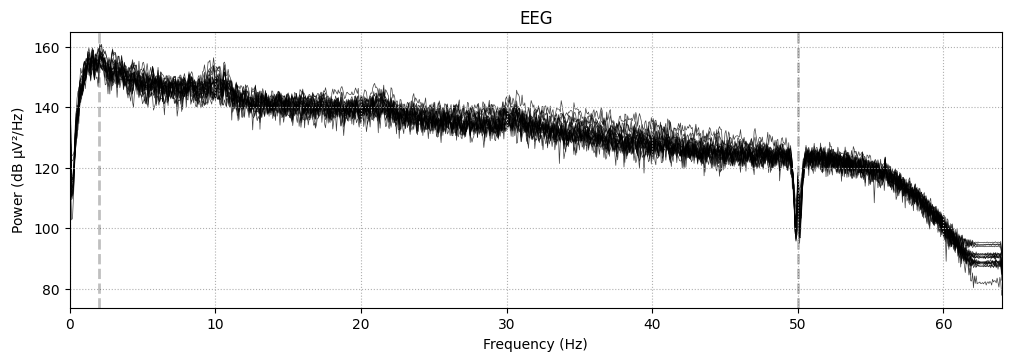

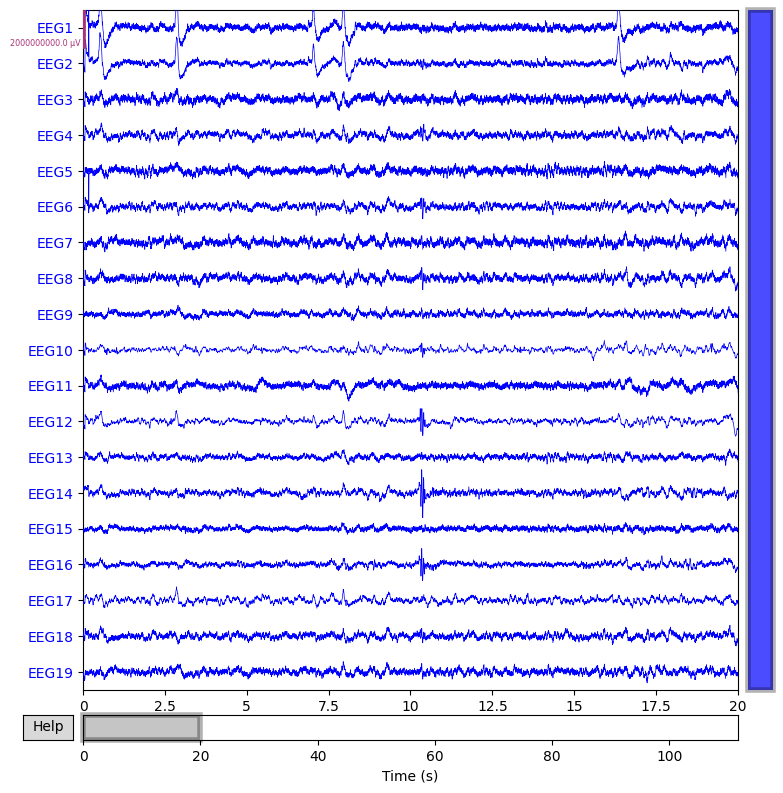

In [19]:
raw = mne.io.read_raw_fif(r'E:\klara\signal project\ADHD_part1_fif\v10p.fif' ,preload=True)
raw.plot(duration=20, n_channels=19, scalings=1000, color='blue')
plt.show()

Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\60517437.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.compute_psd(fmax=64).plot(picks="data", exclude="bads")
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\60517437.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=64).plot(picks="data", exclude="bads")
C:\Users\amgad\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


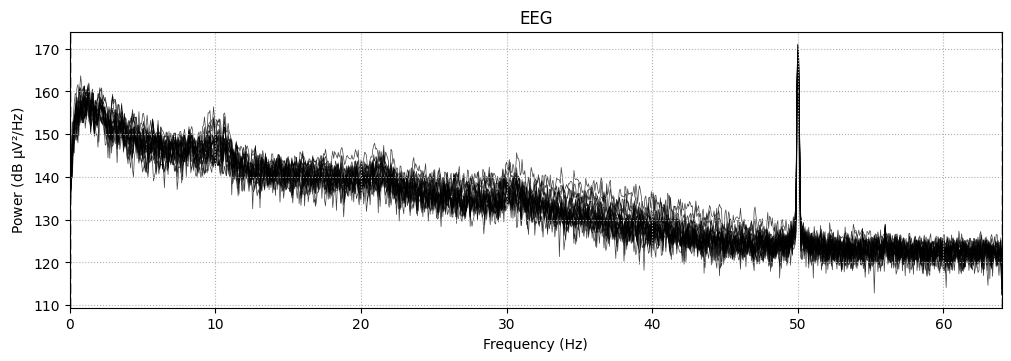

In [20]:
raw.compute_psd(fmax=64).plot(picks="data", exclude="bads")

Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v10p_filtered.fif...
Isotrak not found
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.
Reading 0 ... 14303  =      0.000 ...   111.742 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\236332793.py:1: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v10p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered=mne.io.read_raw_fif(r'E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v10p_filtered.fif', preload=True)


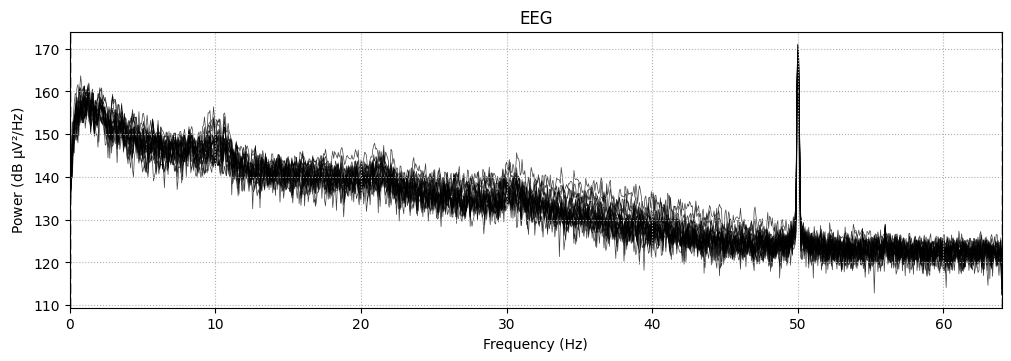

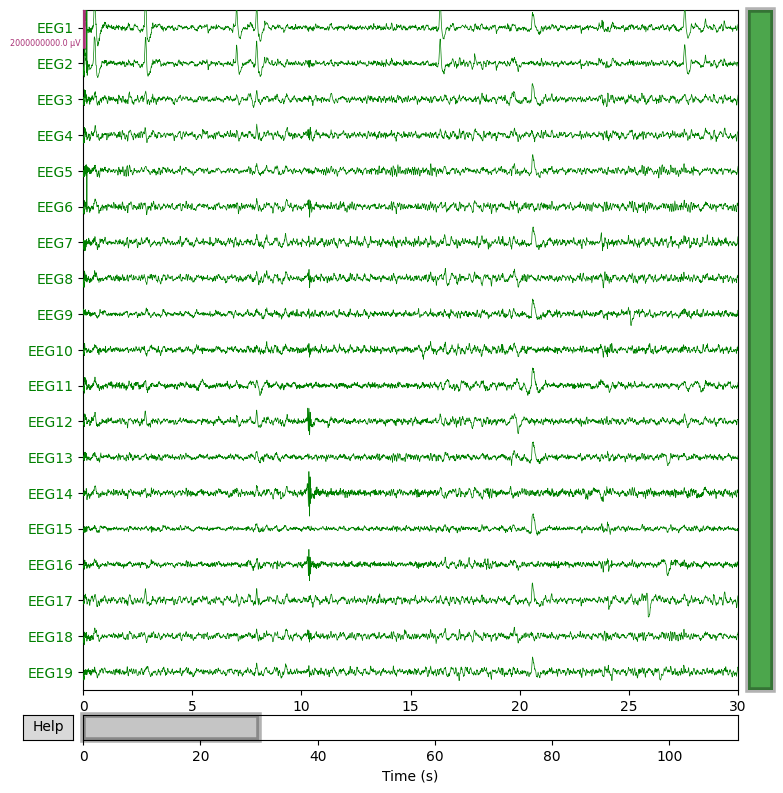

In [21]:
filtered=mne.io.read_raw_fif(r'E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v10p_filtered.fif', preload=True)
filtered.plot(duration=30, n_channels=19, scalings=1000 , color='green')  # Plot filtered data for 5 seconds
plt.show()

Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2287656174.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  filtered.compute_psd(fmax=64).plot(picks="data", exclude="bads")
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\2287656174.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(fmax=64).plot(picks="data", exclude="bads")
C:\Users\amgad\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


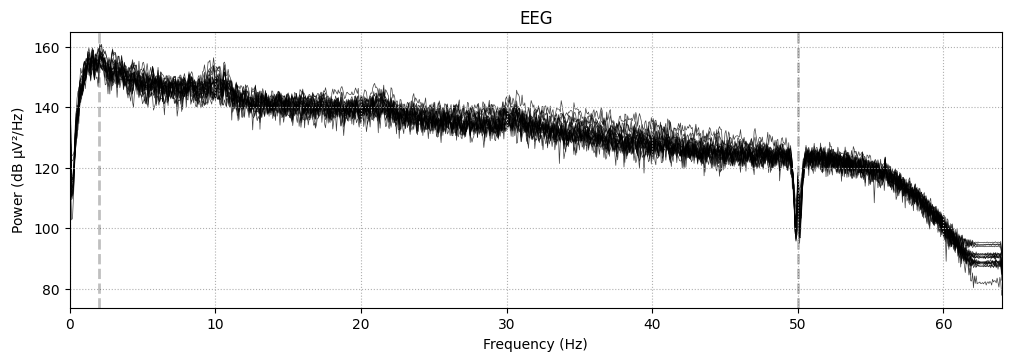

In [22]:
filtered.compute_psd(fmax=64).plot(picks="data", exclude="bads")

In [10]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import os
import glob
import mne
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, AveragePooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from keras.optimizers import Adam

# Constants
SAMPLE_RATE = 512  # Hz
EPOCH_DURATION = 30  # seconds
EPOCH_LENGTH = EPOCH_DURATION * SAMPLE_RATE  # in samples

def split_data(main_directory, output_folder_names, test_size=0.3):
    labeled_files = []
    labels = []

    for output_folder in output_folder_names:
        output_folder_path = os.path.join(main_directory, output_folder)
        fif_files = glob.glob(os.path.join(output_folder_path, 'label_*.fif'))
        
        for fif_file in fif_files:
            labeled_files.append(fif_file)
            label = 1 if 'label_1' in fif_file else 0
            labels.append(label)
    
    train_files, test_files, train_labels, test_labels = train_test_split(
        labeled_files, labels, test_size=test_size, random_state=42, stratify=labels
    )
    
    return train_files, test_files, train_labels, test_labels

def load_eeg_data(filenames, labels, epoch_length=EPOCH_LENGTH):
    data = []
    new_labels = []
    for file, label in zip(filenames, labels):
        raw = mne.io.read_raw_fif(file, preload=True)
        raw_data = raw.get_data()

        n_epochs = raw_data.shape[1] // epoch_length
        for i in range(n_epochs):
            start = i * epoch_length
            end = start + epoch_length
            epoch_data = raw_data[:, start:end]
            data.append(epoch_data)
            new_labels.append(label)
    
    data = np.array(data)
    data = data.reshape(data.shape[0], data.shape[1], data.shape[2], 1)
    return data, np.array(new_labels)

def build_eeg_cnn(input_shape):
    inputs = Input(shape=input_shape)
    
    x = Conv2D(filters=16, kernel_size=(10, 1), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = AveragePooling2D(pool_size=(2, 1))(x)
    x = Dropout(0.25)(x)
    
    x = Conv2D(filters=16, kernel_size=(4, 1), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = AveragePooling2D(pool_size=(2, 1))(x)
    x = Dropout(0.25)(x)
    
    x = Conv2D(filters=32, kernel_size=(1, 128), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = AveragePooling2D(pool_size=(1, 64))(x)
    x = Dropout(0.25)(x)
    
    x = Conv2D(filters=32, kernel_size=(1, 64), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = AveragePooling2D(pool_size=(1, 32))(x)
    x = Dropout(0.25)(x)
    
    x = Flatten()(x)
    
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

main_directory = r'E:\klara\signal project'

output_folder_names = [
    'ADHD_part2_filtered_fif', 
    'ADHD_part1_filtered_fif', 
    'Control_part1_filtered_fif', 
    'Control_part2_filtered_fif'
]

train_files, test_files, train_labels, test_labels = split_data(main_directory, output_folder_names)

X_train, y_train = load_eeg_data(train_files, train_labels, epoch_length=EPOCH_LENGTH)
X_test, y_test = load_eeg_data(test_files, test_labels, epoch_length=EPOCH_LENGTH)
# Reshape data for SMOTE
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_flat, y_train)

# Reshape back to original shape
X_train_res = X_train_res.reshape(X_train_res.shape[0], 19, EPOCH_LENGTH, 1)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train_res shape: {X_train_res.shape}')
print(f'y_train_res shape: {y_train_res.shape}')

input_shape = (19, EPOCH_LENGTH, 1)
model = build_eeg_cnn(input_shape)


# Create an Adam optimizer with the learning rate set to 0.0001
adam_optimizer = Adam(learning_rate=0.0001)
# Compile the model with the custom Adam optimizer
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_res, y_train_res,
    epochs=30,
    batch_size=16,  # Reduce batch size to avoid memory issues
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

precision_adhd = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)
recall_adhd = recall_score(y_test, y_pred, pos_label=1)
recall_control = recall_score(y_test, y_pred, pos_label=0)
f1_adhd = f1_score(y_test, y_pred, pos_label=1)
f1_control = f1_score(y_test, y_pred, pos_label=0)
auc = roc_auc_score(y_test, y_pred_prob)

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Control', 'ADHD'])

print(f'Precision (ADHD): {precision_adhd}')
print(f'Precision (Control): {precision_control}')
print(f'Recall (ADHD): {recall_adhd}')
print(f'Recall (Control): {recall_control}')
print(f'F1-score (ADHD): {f1_adhd}')
print(f'F1-score (Control): {f1_control}')
print(f'AUC: {auc}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v244_filtered.fif...
Isotrak not found
    Range : 0 ... 39029 =      0.000 ...   304.914 secs
Ready.
Reading 0 ... 39029  =      0.000 ...   304.914 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v37p_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v244_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 9285 =      0.000 ...    72.539 secs
Ready.
Reading 0 ... 9285  =      0.000 ...    72.539 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v254_filtered.fif...
Isotrak not found
    Range : 0 ... 10476 =      0.000 ...    81.844 secs
Ready.
Reading 0 ... 10476  =      0.000 ...    81.844 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v1p_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v37p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v254_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 12257 =      0.000 ...    95.758 secs
Ready.
Reading 0 ... 12257  =      0.000 ...    95.758 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v227_filtered.fif...
Isotrak not found
    Range : 0 ... 28079 =      0.000 ...   219.367 secs
Ready.
Reading 0 ... 28079  =      0.000 ...   219.367 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v1p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v227_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v113_filtered.fif...
Isotrak not found
    Range : 0 ... 15573 =      0.000 ...   121.664 secs
Ready.
Reading 0 ... 15573  =      0.000 ...   121.664 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v48p_filtered.fif...
Isotrak not found
    Range : 0 ... 10451 =      0.000 ...    81.648 secs
Ready.
Reading 0 ... 10451  =      0.000 ...    81.648 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v134_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v113_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v48p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 13358 =      0.000 ...   104.359 secs
Ready.
Reading 0 ... 13358  =      0.000 ...   104.359 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v115_filtered.fif...
Isotrak not found
    Range : 0 ... 15650 =      0.000 ...   122.266 secs
Ready.
Reading 0 ... 15650  =      0.000 ...   122.266 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v134_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v115_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v308_filtered.fif...
Isotrak not found
    Range : 0 ... 17024 =      0.000 ...   133.000 secs
Ready.
Reading 0 ... 17024  =      0.000 ...   133.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v40p_filtered.fif...
Isotrak not found
    Range : 0 ... 20096 =      0.000 ...   157.000 secs
Ready.
Reading 0 ... 20096  =      0.000 ...   157.000 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v308_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v40p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v309_filtered.fif...
Isotrak not found
    Range : 0 ... 24817 =      0.000 ...   193.883 secs
Ready.
Reading 0 ... 24817  =      0.000 ...   193.883 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v10p_filtered.fif...
Isotrak not found
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.
Reading 0 ... 14303  =      0.000 ...   111.742 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v309_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v10p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v204_filtered.fif...
Isotrak not found
    Range : 0 ... 20455 =      0.000 ...   159.805 secs
Ready.
Reading 0 ... 20455  =      0.000 ...   159.805 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v143_filtered.fif...
Isotrak not found
    Range : 0 ... 15606 =      0.000 ...   121.922 secs
Ready.
Reading 0 ... 15606  =      0.000 ...   121.922 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v204_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v143_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v57p_filtered.fif...
Isotrak not found
    Range : 0 ... 14691 =      0.000 ...   114.773 secs
Ready.
Reading 0 ... 14691  =      0.000 ...   114.773 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v298_filtered.fif...
Isotrak not found
    Range : 0 ... 17781 =      0.000 ...   138.914 secs
Ready.
Reading 0 ... 17781  =      0.000 ...   138.914 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v57p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v298_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v263_filtered.fif...
Isotrak not found
    Range : 0 ... 18656 =      0.000 ...   145.750 secs
Ready.
Reading 0 ... 18656  =      0.000 ...   145.750 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v38p_filtered.fif...
Isotrak not found
    Range : 0 ... 24694 =      0.000 ...   192.922 secs
Ready.
Reading 0 ... 24694  =      0.000 ...   192.922 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v263_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v38p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v6p_filtered.fif...
Isotrak not found
    Range : 0 ... 17560 =      0.000 ...   137.188 secs
Ready.
Reading 0 ... 17560  =      0.000 ...   137.188 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v274_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v6p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 17322 =      0.000 ...   135.328 secs
Ready.
Reading 0 ... 17322  =      0.000 ...   135.328 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v28p_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v274_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 27611 =      0.000 ...   215.711 secs
Ready.
Reading 0 ... 27611  =      0.000 ...   215.711 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v28p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v34p_filtered.fif...
Isotrak not found
    Range : 0 ... 19554 =      0.000 ...   152.766 secs
Ready.
Reading 0 ... 19554  =      0.000 ...   152.766 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v24p_filtered.fif...
Isotrak not found
    Range : 0 ... 16384 =      0.000 ...   128.000 secs
Ready.


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v34p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v24p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Reading 0 ... 16384  =      0.000 ...   128.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v265_filtered.fif...
Isotrak not found
    Range : 0 ... 18388 =      0.000 ...   143.656 secs
Ready.
Reading 0 ... 18388  =      0.000 ...   143.656 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v60p_filtered.fif...
Isotrak not found
    Range : 0 ... 12928 =      0.000 ...   101.000 secs
Ready.
Reading 0 ... 12928  =      0.000 ...   101.000 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v56p_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v265_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v60p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 14138 =      0.000 ...   110.453 secs
Ready.
Reading 0 ... 14138  =      0.000 ...   110.453 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v181_filtered.fif...
Isotrak not found
    Range : 0 ... 10667 =      0.000 ...    83.336 secs
Ready.
Reading 0 ... 10667  =      0.000 ...    83.336 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v279_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v56p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v181_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 20133 =      0.000 ...   157.289 secs
Ready.
Reading 0 ... 20133  =      0.000 ...   157.289 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v151_filtered.fif...
Isotrak not found
    Range : 0 ... 20913 =      0.000 ...   163.383 secs
Ready.
Reading 0 ... 20913  =      0.000 ...   163.383 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v279_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v151_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v147_filtered.fif...
Isotrak not found
    Range : 0 ... 14208 =      0.000 ...   111.000 secs
Ready.
Reading 0 ... 14208  =      0.000 ...   111.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v18p_filtered.fif...
Isotrak not found
    Range : 0 ... 25002 =      0.000 ...   195.328 secs
Ready.
Reading 0 ... 25002  =      0.000 ...   195.328 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v147_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v18p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v111_filtered.fif...
Isotrak not found
    Range : 0 ... 15309 =      0.000 ...   119.602 secs
Ready.
Reading 0 ... 15309  =      0.000 ...   119.602 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v288_filtered.fif...
Isotrak not found
    Range : 0 ... 20114 =      0.000 ...   157.141 secs
Ready.
Reading 0 ... 20114  =      0.000 ...   157.141 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v111_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v288_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v138_filtered.fif...
Isotrak not found
    Range : 0 ... 12487 =      0.000 ...    97.555 secs
Ready.
Reading 0 ... 12487  =      0.000 ...    97.555 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v305_filtered.fif...
Isotrak not found
    Range : 0 ... 22272 =      0.000 ...   174.000 secs
Ready.
Reading 0 ... 22272  =      0.000 ...   174.000 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v138_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v305_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v112_filtered.fif...
Isotrak not found
    Range : 0 ... 15942 =      0.000 ...   124.547 secs
Ready.
Reading 0 ... 15942  =      0.000 ...   124.547 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v206_filtered.fif...
Isotrak not found
    Range : 0 ... 20172 =      0.000 ...   157.594 secs
Ready.
Reading 0 ... 20172  =      0.000 ...   157.594 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v112_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v206_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v50p_filtered.fif...
Isotrak not found
    Range : 0 ... 16238 =      0.000 ...   126.859 secs
Ready.
Reading 0 ... 16238  =      0.000 ...   126.859 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v36p_filtered.fif...
Isotrak not found
    Range : 0 ... 17400 =      0.000 ...   135.938 secs
Ready.
Reading 0 ... 17400  =      0.000 ...   135.938 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v50p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v36p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v39p_filtered.fif...
Isotrak not found
    Range : 0 ... 18176 =      0.000 ...   142.000 secs
Ready.
Reading 0 ... 18176  =      0.000 ...   142.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v213_filtered.fif...
Isotrak not found
    Range : 0 ... 12352 =      0.000 ...    96.500 secs
Ready.
Reading 0 ... 12352  =      0.000 ...    96.500 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v120_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v39p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v213_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 12032 =      0.000 ...    94.000 secs
Ready.
Reading 0 ... 12032  =      0.000 ...    94.000 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v116_filtered.fif...
Isotrak not found
    Range : 0 ... 19300 =      0.000 ...   150.781 secs
Ready.
Reading 0 ... 19300  =      0.000 ...   150.781 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v120_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v116_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v3p_filtered.fif...
Isotrak not found
    Range : 0 ... 33569 =      0.000 ...   262.258 secs
Ready.
Reading 0 ... 33569  =      0.000 ...   262.258 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v3p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v231_filtered.fif...
Isotrak not found
    Range : 0 ... 19712 =      0.000 ...   154.000 secs
Ready.
Reading 0 ... 19712  =      0.000 ...   154.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v31p_filtered.fif...
Isotrak not found
    Range : 0 ... 11678 =      0.000 ...    91.234 secs
Ready.
Reading 0 ... 11678  =      0.000 ...    91.234 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v209_filtered.fif...
Isotrak not found


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v231_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v31p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\

    Range : 0 ... 30272 =      0.000 ...   236.500 secs
Ready.
Reading 0 ... 30272  =      0.000 ...   236.500 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v246_filtered.fif...
Isotrak not found
    Range : 0 ... 21306 =      0.000 ...   166.453 secs
Ready.
Reading 0 ... 21306  =      0.000 ...   166.453 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v215_filtered.fif...
Isotrak not found
    Range : 0 ... 21371 =      0.000 ...   166.961 secs
Ready.
Reading 0 ... 21371  =      0.000 ...   166.961 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v117_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v246_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v215_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 25658 =      0.000 ...   200.453 secs
Ready.
Reading 0 ... 25658  =      0.000 ...   200.453 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v149_filtered.fif...
Isotrak not found
    Range : 0 ... 17097 =      0.000 ...   133.570 secs
Ready.
Reading 0 ... 17097  =      0.000 ...   133.570 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v117_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v149_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v12p_filtered.fif...
Isotrak not found
    Range : 0 ... 17603 =      0.000 ...   137.523 secs
Ready.
Reading 0 ... 17603  =      0.000 ...   137.523 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v250_filtered.fif...
Isotrak not found
    Range : 0 ... 13852 =      0.000 ...   108.219 secs
Ready.
Reading 0 ... 13852  =      0.000 ...   108.219 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v238_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v12p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v250_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\

Isotrak not found
    Range : 0 ... 9851 =      0.000 ...    76.961 secs
Ready.
Reading 0 ... 9851  =      0.000 ...    76.961 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v129_filtered.fif...
Isotrak not found
    Range : 0 ... 11207 =      0.000 ...    87.555 secs
Ready.
Reading 0 ... 11207  =      0.000 ...    87.555 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v47p_filtered.fif...
Isotrak not found
    Range : 0 ... 10863 =      0.000 ...    84.867 secs
Ready.
Reading 0 ... 10863  =      0.000 ...    84.867 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v30p_filtered.fif...
Isotrak not found
    Range : 0 ... 21662 =      0.000 ...   169.234 secs
Ready.
Reading 0 ... 21662  =      0.000 ...   169.234 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v129_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v47p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\

Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v118_filtered.fif...
Isotrak not found
    Range : 0 ... 12006 =      0.000 ...    93.797 secs
Ready.
Reading 0 ... 12006  =      0.000 ...    93.797 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v108_filtered.fif...
Isotrak not found
    Range : 0 ... 19025 =      0.000 ...   148.633 secs
Ready.
Reading 0 ... 19025  =      0.000 ...   148.633 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v307_filtered.fif...
Isotrak not found


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v118_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v108_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\

    Range : 0 ... 22806 =      0.000 ...   178.172 secs
Ready.
Reading 0 ... 22806  =      0.000 ...   178.172 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v177_filtered.fif...
Isotrak not found
    Range : 0 ... 16696 =      0.000 ...   130.438 secs
Ready.
Reading 0 ... 16696  =      0.000 ...   130.438 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v303_filtered.fif...
Isotrak not found
    Range : 0 ... 19221 =      0.000 ...   150.164 secs
Ready.
Reading 0 ... 19221  =      0.000 ...   150.164 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v43p_filtered.fif...
Isotrak not found
    Range : 0 ... 12749 =      0.000 ...    99.602 secs
Ready.


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v177_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v303_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\kla

Reading 0 ... 12749  =      0.000 ...    99.602 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v46p_filtered.fif...
Isotrak not found
    Range : 0 ... 9822 =      0.000 ...    76.734 secs
Ready.
Reading 0 ... 9822  =      0.000 ...    76.734 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v110_filtered.fif...
Isotrak not found
    Range : 0 ... 16548 =      0.000 ...   129.281 secs
Ready.
Reading 0 ... 16548  =      0.000 ...   129.281 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v44p_filtered.fif...
Isotrak not found
    Range : 0 ... 11392 =      0.000 ...    89.000 secs
Ready.
Reading 0 ... 11392  =      0.000 ...    89.000 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v107_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v46p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v110_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\

Isotrak not found
    Range : 0 ... 19793 =      0.000 ...   154.633 secs
Ready.
Reading 0 ... 19793  =      0.000 ...   154.633 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v127_filtered.fif...
Isotrak not found
    Range : 0 ... 14720 =      0.000 ...   115.000 secs
Ready.
Reading 0 ... 14720  =      0.000 ...   115.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v35p_filtered.fif...
Isotrak not found
    Range : 0 ... 15304 =      0.000 ...   119.562 secs
Ready.
Reading 0 ... 15304  =      0.000 ...   119.562 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v286_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v107_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v127_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\

Isotrak not found
    Range : 0 ... 11464 =      0.000 ...    89.562 secs
Ready.
Reading 0 ... 11464  =      0.000 ...    89.562 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v42p_filtered.fif...
Isotrak not found
    Range : 0 ... 16703 =      0.000 ...   130.492 secs
Ready.
Reading 0 ... 16703  =      0.000 ...   130.492 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v21p_filtered.fif...
Isotrak not found
    Range : 0 ... 16573 =      0.000 ...   129.477 secs
Ready.
Reading 0 ... 16573  =      0.000 ...   129.477 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v304_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v286_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v42p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\kla

Isotrak not found
    Range : 0 ... 13399 =      0.000 ...   104.680 secs
Ready.
Reading 0 ... 13399  =      0.000 ...   104.680 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v8p_filtered.fif...
Isotrak not found
    Range : 0 ... 15775 =      0.000 ...   123.242 secs
Ready.
Reading 0 ... 15775  =      0.000 ...   123.242 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v123_filtered.fif...
Isotrak not found
    Range : 0 ... 14549 =      0.000 ...   113.664 secs
Ready.
Reading 0 ... 14549  =      0.000 ...   113.664 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v190_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v304_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v8p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klar

Isotrak not found
    Range : 0 ... 15464 =      0.000 ...   120.812 secs
Ready.
Reading 0 ... 15464  =      0.000 ...   120.812 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v55p_filtered.fif...
Isotrak not found
    Range : 0 ... 14281 =      0.000 ...   111.570 secs
Ready.
Reading 0 ... 14281  =      0.000 ...   111.570 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v306_filtered.fif...
Isotrak not found
    Range : 0 ... 18300 =      0.000 ...   142.969 secs
Ready.
Reading 0 ... 18300  =      0.000 ...   142.969 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v300_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v190_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v55p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\kla

Isotrak not found
    Range : 0 ... 25984 =      0.000 ...   203.000 secs
Ready.
Reading 0 ... 25984  =      0.000 ...   203.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v19p_filtered.fif...
Isotrak not found
    Range : 0 ... 23062 =      0.000 ...   180.172 secs
Ready.
Reading 0 ... 23062  =      0.000 ...   180.172 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v27p_filtered.fif...
Isotrak not found
    Range : 0 ... 28879 =      0.000 ...   225.617 secs


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v300_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v19p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\kla

Ready.
Reading 0 ... 28879  =      0.000 ...   225.617 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v121_filtered.fif...
Isotrak not found
    Range : 0 ... 16376 =      0.000 ...   127.938 secs
Ready.
Reading 0 ... 16376  =      0.000 ...   127.938 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v58p_filtered.fif...
Isotrak not found
    Range : 0 ... 13917 =      0.000 ...   108.727 secs
Ready.
Reading 0 ... 13917  =      0.000 ...   108.727 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v121_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v58p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v49p_filtered.fif...
Isotrak not found
    Range : 0 ... 16768 =      0.000 ...   131.000 secs
Ready.
Reading 0 ... 16768  =      0.000 ...   131.000 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v114_filtered.fif...
Isotrak not found
    Range : 0 ... 13303 =      0.000 ...   103.930 secs
Ready.
Reading 0 ... 13303  =      0.000 ...   103.930 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v59p_filtered.fif...
Isotrak not found
    Range : 0 ... 16512 =      0.000 ...   129.000 secs
Ready.
Reading 0 ... 16512  =      0.000 ...   129.000 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v299_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v49p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v114_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\

Isotrak not found
    Range : 0 ... 22259 =      0.000 ...   173.898 secs
Ready.
Reading 0 ... 22259  =      0.000 ...   173.898 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v45p_filtered.fif...
Isotrak not found
    Range : 0 ... 10870 =      0.000 ...    84.922 secs
Ready.
Reading 0 ... 10870  =      0.000 ...    84.922 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v196_filtered.fif...
Isotrak not found
    Range : 0 ... 13394 =      0.000 ...   104.641 secs
Ready.
Reading 0 ... 13394  =      0.000 ...   104.641 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v200_filtered.fif...
Isotrak not found
    Range : 0 ... 12738 =      0.000 ...    99.516 secs
Ready.
Reading 0 ... 12738  =      0.000 ...    99.516 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v140_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v45p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v196_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\kla

Isotrak not found
    Range : 0 ... 17186 =      0.000 ...   134.266 secs
Ready.
Reading 0 ... 17186  =      0.000 ...   134.266 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v53p_filtered.fif...
Isotrak not found
    Range : 0 ... 19121 =      0.000 ...   149.383 secs
Ready.
Reading 0 ... 19121  =      0.000 ...   149.383 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v179_filtered.fif...
Isotrak not found
    Range : 0 ... 12672 =      0.000 ...    99.000 secs


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v140_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v53p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\

Ready.
Reading 0 ... 12672  =      0.000 ...    99.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v173_filtered.fif...
Isotrak not found
    Range : 0 ... 24240 =      0.000 ...   189.375 secs
Ready.
Reading 0 ... 24240  =      0.000 ...   189.375 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v131_filtered.fif...
Isotrak not found
    Range : 0 ... 16685 =      0.000 ...   130.352 secs
Ready.
Reading 0 ... 16685  =      0.000 ...   130.352 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v22p_filtered.fif...
Isotrak not found
    Range : 0 ... 12099 =      0.000 ...    94.523 secs
Ready.


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v173_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v131_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\kla

Reading 0 ... 12099  =      0.000 ...    94.523 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v270_filtered.fif...
Isotrak not found
    Range : 0 ... 23680 =      0.000 ...   185.000 secs
Ready.
Reading 0 ... 23680  =      0.000 ...   185.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v234_filtered.fif...
Isotrak not found
    Range : 0 ... 34190 =      0.000 ...   267.109 secs
Ready.
Reading 0 ... 34190  =      0.000 ...   267.109 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v41p_filtered.fif...
Isotrak not found
    Range : 0 ... 12499 =      0.000 ...    97.648 secs


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v270_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v234_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\

Ready.
Reading 0 ... 12499  =      0.000 ...    97.648 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v32p_filtered.fif...
Isotrak not found
    Range : 0 ... 18048 =      0.000 ...   141.000 secs
Ready.
Reading 0 ... 18048  =      0.000 ...   141.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v29p_filtered.fif...
Isotrak not found
    Range : 0 ... 24192 =      0.000 ...   189.000 secs
Ready.
Reading 0 ... 24192  =      0.000 ...   189.000 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v310_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v32p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v29p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 17792 =      0.000 ...   139.000 secs
Ready.
Reading 0 ... 17792  =      0.000 ...   139.000 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v133_filtered.fif...
Isotrak not found
    Range : 0 ... 15072 =      0.000 ...   117.750 secs
Ready.
Reading 0 ... 15072  =      0.000 ...   117.750 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v310_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v133_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v54p_filtered.fif...
Isotrak not found
    Range : 0 ... 19233 =      0.000 ...   150.258 secs
Ready.
Reading 0 ... 19233  =      0.000 ...   150.258 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v198_filtered.fif...
Isotrak not found
    Range : 0 ... 19620 =      0.000 ...   153.281 secs
Ready.
Reading 0 ... 19620  =      0.000 ...   153.281 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v54p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v198_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v236_filtered.fif...
Isotrak not found
    Range : 0 ... 13501 =      0.000 ...   105.477 secs
Ready.
Reading 0 ... 13501  =      0.000 ...   105.477 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v219_filtered.fif...
Isotrak not found
    Range : 0 ... 27156 =      0.000 ...   212.156 secs
Ready.
Reading 0 ... 27156  =      0.000 ...   212.156 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v14p_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v236_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v219_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 17561 =      0.000 ...   137.195 secs
Ready.
Reading 0 ... 17561  =      0.000 ...   137.195 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v183_filtered.fif...
Isotrak not found
    Range : 0 ... 18590 =      0.000 ...   145.234 secs
Ready.
Reading 0 ... 18590  =      0.000 ...   145.234 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v52p_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v14p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v183_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 13882 =      0.000 ...   108.453 secs
Ready.
Reading 0 ... 13882  =      0.000 ...   108.453 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v125_filtered.fif...
Isotrak not found
    Range : 0 ... 15377 =      0.000 ...   120.133 secs
Ready.
Reading 0 ... 15377  =      0.000 ...   120.133 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v52p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v125_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v33p_filtered.fif...
Isotrak not found
    Range : 0 ... 29216 =      0.000 ...   228.250 secs
Ready.
Reading 0 ... 29216  =      0.000 ...   228.250 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v284_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v33p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v284_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 15382 =      0.000 ...   120.172 secs
Ready.
Reading 0 ... 15382  =      0.000 ...   120.172 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v20p_filtered.fif...
Isotrak not found
    Range : 0 ... 35327 =      0.000 ...   275.992 secs
Ready.
Reading 0 ... 35327  =      0.000 ...   275.992 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v15p_filtered.fif...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v20p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Isotrak not found
    Range : 0 ... 43251 =      0.000 ...   337.898 secs
Ready.
Reading 0 ... 43251  =      0.000 ...   337.898 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v15p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v25p_filtered.fif...
Isotrak not found
    Range : 0 ... 9893 =      0.000 ...    77.289 secs
Ready.
Reading 0 ... 9893  =      0.000 ...    77.289 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v302_filtered.fif...
Isotrak not found
    Range : 0 ... 17840 =      0.000 ...   139.375 secs
Ready.
Reading 0 ... 17840  =      0.000 ...   139.375 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v25p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v302_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v297_filtered.fif...
Isotrak not found
    Range : 0 ... 13696 =      0.000 ...   107.000 secs
Ready.
Reading 0 ... 13696  =      0.000 ...   107.000 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v109_filtered.fif...
Isotrak not found
    Range : 0 ... 16043 =      0.000 ...   125.336 secs
Ready.
Reading 0 ... 16043  =      0.000 ...   125.336 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v297_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v109_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v51p_filtered.fif...
Isotrak not found
    Range : 0 ... 7982 =      0.000 ...    62.359 secs
Ready.
Reading 0 ... 7982  =      0.000 ...    62.359 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\342715939.py:42: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v51p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


X_train shape: (55, 19, 15360, 1)
X_test shape: (27, 19, 15360, 1)
y_train shape: (55,)
y_test shape: (27,)
X_train_res shape: (66, 19, 15360, 1)
y_train_res shape: (66,)
Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 101s 17s/step - accuracy: 0.6326 - loss: 0.6897 - val_accuracy: 0.4074 - val_loss: 0.9443
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 77s 15s/step - accuracy: 0.4735 - loss: 0.7780 - val_accuracy: 0.4074 - val_loss: 0.8659
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 77s 15s/step - accuracy: 0.4568 - loss: 0.7597 - val_accuracy: 0.4074 - val_loss: 0.8024
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 17s/step - accuracy: 0.5593 - loss: 0.7182 - val_accuracy: 0.4074 - val_loss: 0.7759
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 95s 18s/step - accuracy: 0.4755 - loss: 0.6960 - val_accuracy: 0.4074 - val_loss: 0.7659
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 90s 17s/step - accuracy: 0.4905 - loss: 0.6762 - val_accuracy: 0.4074 - val_loss: 0.7485
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 80s 16s/step - accuracy: 0.5473 - loss: 0.

In [25]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 19, 15360, 1)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 19, 15360, 16)       │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 19, 15360, 16)       │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_24                 │ (None, 9, 15360, 16)        │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 9, 15360, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 9, 15360, 16)        │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 9, 15360, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_25                 │ (None, 4, 15360, 16)        │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 4, 15360, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 4, 15360, 32)        │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 4, 15360, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_26                 │ (None, 4, 240, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 4, 240, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 4, 240, 32)          │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 4, 240, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_27                 │ (None, 4, 7, 32)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 4, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 576,389 (2.20 MB)

 Trainable params: 192,065 (750.25 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 384,132 (1.47 MB)

In [26]:
print(len(train_files), len(test_files))

84 37


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


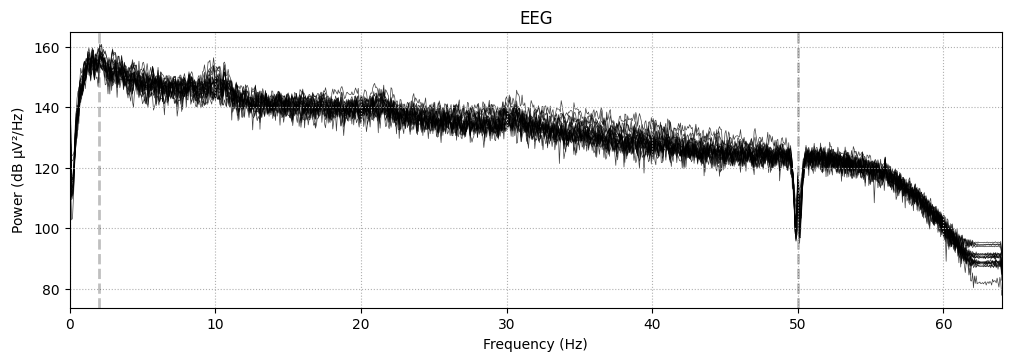

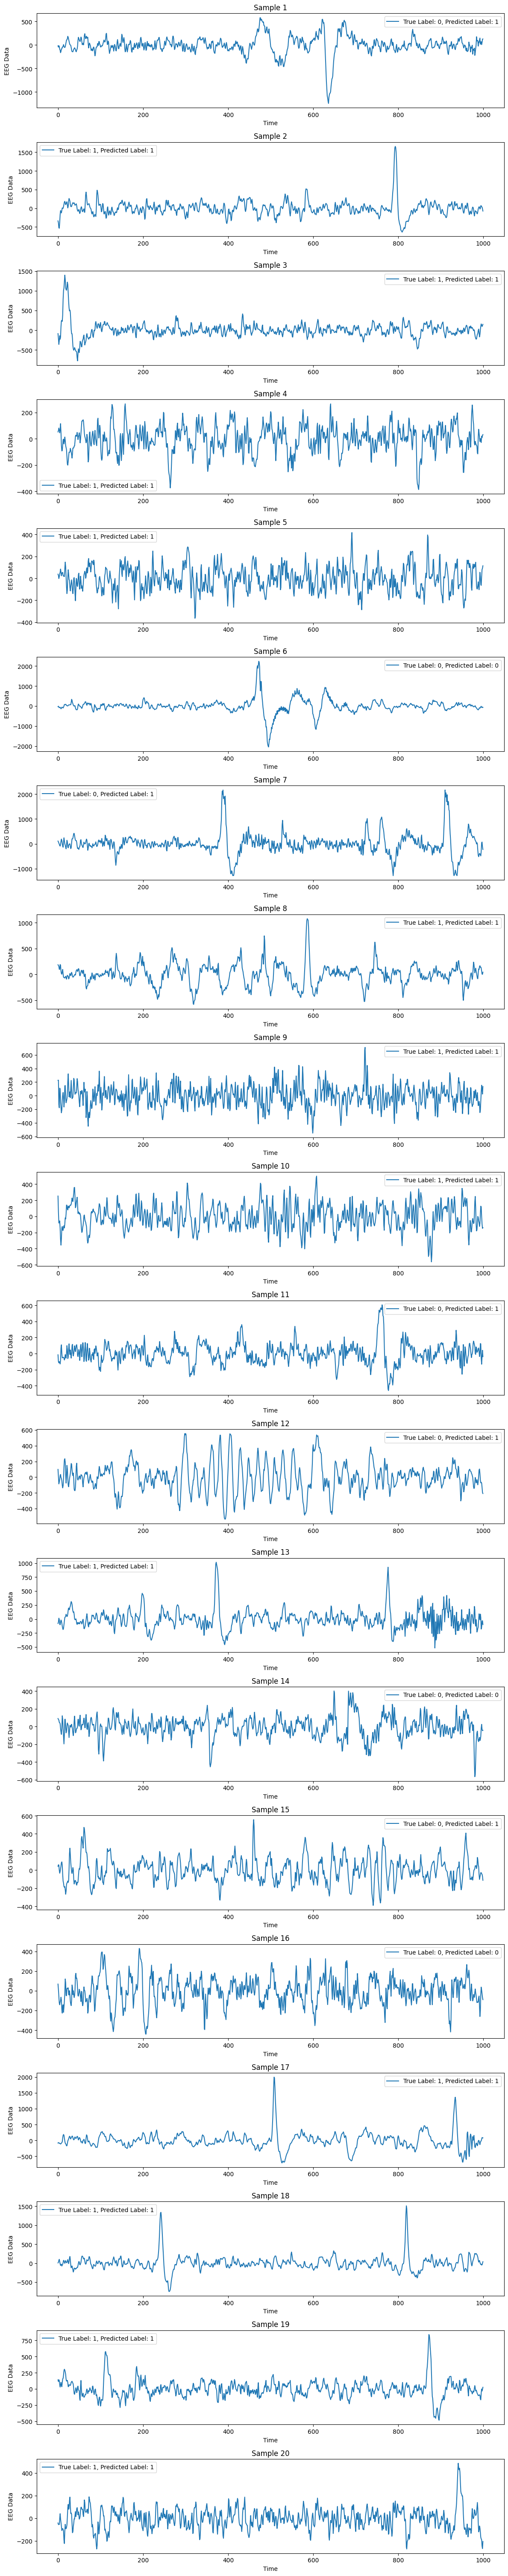

In [18]:
predicted_labels = model.predict(X_test)
predicted_classes = (predicted_labels > 0.5).astype(int).flatten()

# Plot EEG data with true and predicted labels
num_samples = X_test.shape[0]
num_channels = X_test.shape[1]
num_subplots = num_samples + 1  # Add one for the legend

# Specify the range of indices to plot
start_index = 1000  # Example: start from index 1000
end_index = 2000    # Example: end at index 2000

plt.figure(figsize=(12, 3 * num_subplots))
for i in range(num_samples):
    plt.subplot(num_subplots, 1, i + 1)
    # Flatten the EEG data for plotting
    flattened_data = X_test[i].flatten()[start_index:end_index]
    plt.plot(flattened_data, label=f'True Label: {y_test[i]}, Predicted Label: {predicted_classes[i]}')
    plt.xlabel('Time')
    plt.ylabel('EEG Data')
    plt.title(f'Sample {i + 1}')
    plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


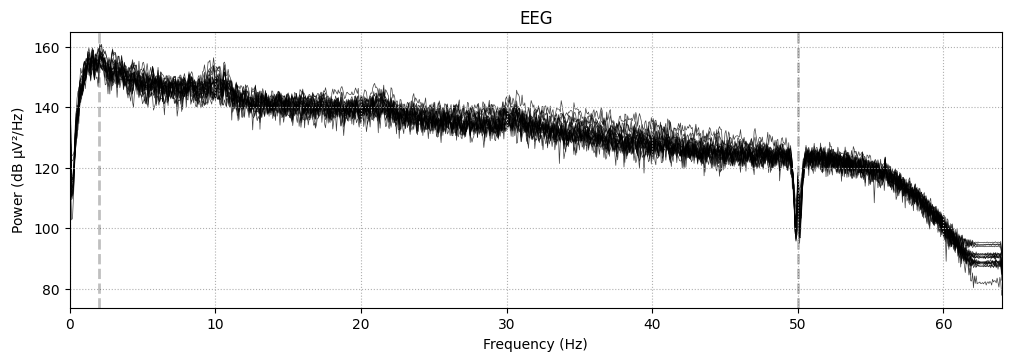

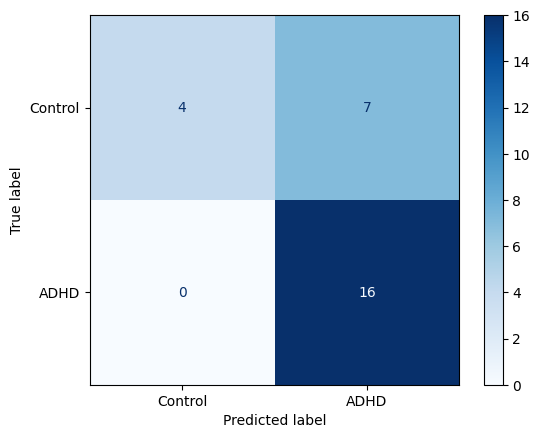

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os
import glob

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Control', 'ADHD'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


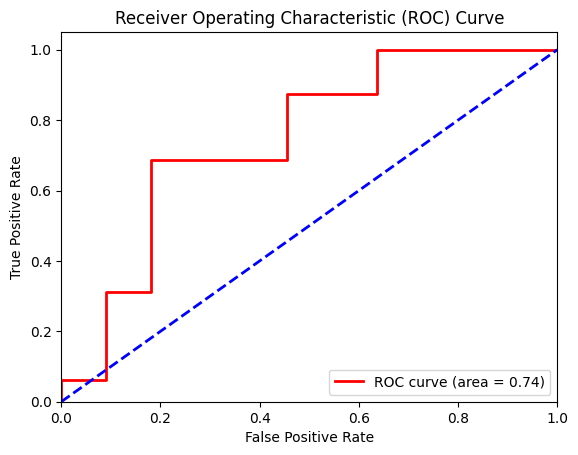

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import os
import glob



# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [41]:
#LSTM model 
import os
import glob
import mne
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from keras.optimizers import Adam

# Constants
SAMPLE_RATE = 512  # Hz
EPOCH_DURATION = 30  # seconds
EPOCH_LENGTH = EPOCH_DURATION * SAMPLE_RATE  # in samples

def split_data(main_directory, output_folder_names, test_size=0.3):
    labeled_files = []
    labels = []

    for output_folder in output_folder_names:
        output_folder_path = os.path.join(main_directory, output_folder)
        fif_files = glob.glob(os.path.join(output_folder_path, 'label_*.fif'))
        
        for fif_file in fif_files:
            labeled_files.append(fif_file)
            label = 1 if 'label_1' in fif_file else 0
            labels.append(label)
    
    train_files, test_files, train_labels, test_labels = train_test_split(
        labeled_files, labels, test_size=test_size, random_state=42, stratify=labels
    )
    
    return train_files, test_files, train_labels, test_labels

def load_eeg_data(filenames, labels, epoch_length=EPOCH_LENGTH):
    data = []
    new_labels = []
    for file, label in zip(filenames, labels):
        raw = mne.io.read_raw_fif(file, preload=True)
        raw_data = raw.get_data()

        n_epochs = raw_data.shape[1] // epoch_length
        for i in range(n_epochs):
            start = i * epoch_length
            end = start + epoch_length
            epoch_data = raw_data[:, start:end]
            data.append(epoch_data)
            new_labels.append(label)
    
    data = np.array(data)
    return data, np.array(new_labels)

def build_eeg_lstm(input_shape):
    inputs = Input(shape=input_shape)
    
    x = LSTM(64, return_sequences=True)(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = LSTM(64)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)
    
    lstm_model = Model(inputs=inputs, outputs=outputs)
    
    return lstm_model

main_directory = r'E:\klara\signal project'

output_folder_names = [
    'ADHD_part2_filtered_fif', 
    'ADHD_part1_filtered_fif', 
    'Control_part1_filtered_fif', 
    'Control_part2_filtered_fif'
]

train_files, test_files, train_labels, test_labels = split_data(main_directory, output_folder_names)

X_train, y_train = load_eeg_data(train_files, train_labels, epoch_length=EPOCH_LENGTH)
X_test, y_test = load_eeg_data(test_files, test_labels, epoch_length=EPOCH_LENGTH)

# Reshape data for SMOTE
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_flat, y_train)

# Reshape back to original shape
X_train_res = X_train_res.reshape(X_train_res.shape[0], 19, EPOCH_LENGTH)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train_res shape: {X_train_res.shape}')
print(f'y_train_res shape: {y_train_res.shape}')

input_shape = (19, EPOCH_LENGTH)
lstm_model = build_eeg_lstm(input_shape)

# Create an Adam optimizer with the learning rate set to 0.0001
adam_optimizer = Adam(learning_rate=0.0001)
# Compile the lstm_model with the custom Adam optimizer
lstm_model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = lstm_model.fit(
    X_train_res, y_train_res,
    epochs=30,
    batch_size=16,  # Reduce batch size to avoid memory issues
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

y_pred_prob = lstm_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

precision_adhd = precision_score(y_test, y_pred, pos_label=1)
precision_control = precision_score(y_test, y_pred, pos_label=0)
recall_adhd = recall_score(y_test, y_pred, pos_label=1)
recall_control = recall_score(y_test, y_pred, pos_label=0)
f1_adhd = f1_score(y_test, y_pred, pos_label=1)
f1_control = f1_score(y_test, y_pred, pos_label=0)
auc = roc_auc_score(y_test, y_pred_prob)

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Control', 'ADHD'])

print(f'Precision (ADHD): {precision_adhd}')
print(f'Precision (Control): {precision_control}')
print(f'Recall (ADHD): {recall_adhd}')
print(f'Recall (Control): {recall_control}')
print(f'F1-score (ADHD): {f1_adhd}')
print(f'F1-score (Control): {f1_control}')
print(f'AUC: {auc}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v244_filtered.fif...
Isotrak not found
    Range : 0 ... 39029 =      0.000 ...   304.914 secs
Ready.
Reading 0 ... 39029  =      0.000 ...   304.914 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v37p_filtered.fif...
Isotrak not found
    Range : 0 ... 9285 =      0.000 ...    72.539 secs
Ready.
Reading 0 ... 9285  =      0.000 ...    72.539 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v254_filtered.fif...
Isotrak not found
    Range : 0 ... 10476 =      0.000 ...    81.844 secs
Ready.
Reading 0 ... 10476  =      0.000 ...    81.844 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v1p_filtered.fif...
Isotrak not found
    Range : 0 ... 12257 =      0.000 ...    95.758 secs
Ready.
Reading 0 ... 12257  =      0.000 ...    95.758 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_fi

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v244_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v37p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\

Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v113_filtered.fif...
Isotrak not found
    Range : 0 ... 15573 =      0.000 ...   121.664 secs
Ready.
Reading 0 ... 15573  =      0.000 ...   121.664 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v48p_filtered.fif...
Isotrak not found
    Range : 0 ... 10451 =      0.000 ...    81.648 secs
Ready.
Reading 0 ... 10451  =      0.000 ...    81.648 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v134_filtered.fif...
Isotrak not found
    Range : 0 ... 13358 =      0.000 ...   104.359 secs
Ready.
Reading 0 ... 13358  =      0.000 ...   104.359 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v115_filtered.fif...
Isotrak not found
    Range : 0 ... 15650 =      0.000 ...   122.266 secs
Ready.
Reading 0 ... 15650  =      0.000 ...   122.266 secs...
Opening raw data file E:\klara\signal projec

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v113_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v48p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\

Ready.
Reading 0 ... 20096  =      0.000 ...   157.000 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v309_filtered.fif...
Isotrak not found
    Range : 0 ... 24817 =      0.000 ...   193.883 secs
Ready.
Reading 0 ... 24817  =      0.000 ...   193.883 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v10p_filtered.fif...
Isotrak not found
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.
Reading 0 ... 14303  =      0.000 ...   111.742 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v204_filtered.fif...
Isotrak not found
    Range : 0 ... 20455 =      0.000 ...   159.805 secs
Ready.
Reading 0 ... 20455  =      0.000 ...   159.805 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v143_filtered.fif...
Isotrak not found
    Range : 0 ... 15606 =      0.000 ...   121.922 secs
Ready.
Reading 0 ... 15606  =      0.000 ...   121

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v309_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v10p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\kla

Reading 0 ... 14691  =      0.000 ...   114.773 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v298_filtered.fif...
Isotrak not found
    Range : 0 ... 17781 =      0.000 ...   138.914 secs
Ready.
Reading 0 ... 17781  =      0.000 ...   138.914 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v263_filtered.fif...
Isotrak not found
    Range : 0 ... 18656 =      0.000 ...   145.750 secs
Ready.
Reading 0 ... 18656  =      0.000 ...   145.750 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v38p_filtered.fif...
Isotrak not found
    Range : 0 ... 24694 =      0.000 ...   192.922 secs
Ready.
Reading 0 ... 24694  =      0.000 ...   192.922 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v6p_filtered.fif...
Isotrak not found
    Range : 0 ... 17560 =      0.000 ...   137.188 secs
Ready.
Reading 0 ... 17560  =      0.000 ...   137.188 secs..

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v298_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v263_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\kla

Reading 0 ... 19554  =      0.000 ...   152.766 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v24p_filtered.fif...
Isotrak not found
    Range : 0 ... 16384 =      0.000 ...   128.000 secs
Ready.
Reading 0 ... 16384  =      0.000 ...   128.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v265_filtered.fif...
Isotrak not found
    Range : 0 ... 18388 =      0.000 ...   143.656 secs
Ready.
Reading 0 ... 18388  =      0.000 ...   143.656 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v60p_filtered.fif...
Isotrak not found
    Range : 0 ... 12928 =      0.000 ...   101.000 secs
Ready.
Reading 0 ... 12928  =      0.000 ...   101.000 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v56p_filtered.fif...
Isotrak not found
    Range : 0 ... 14138 =      0.000 ...   110.453 secs
Ready.
Reading 0 ... 14138  =      0.000 ...   110.453 se

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v24p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v265_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\

Isotrak not found
    Range : 0 ... 20913 =      0.000 ...   163.383 secs
Ready.
Reading 0 ... 20913  =      0.000 ...   163.383 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v147_filtered.fif...
Isotrak not found
    Range : 0 ... 14208 =      0.000 ...   111.000 secs
Ready.
Reading 0 ... 14208  =      0.000 ...   111.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v18p_filtered.fif...
Isotrak not found
    Range : 0 ... 25002 =      0.000 ...   195.328 secs
Ready.
Reading 0 ... 25002  =      0.000 ...   195.328 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v111_filtered.fif...
Isotrak not found
    Range : 0 ... 15309 =      0.000 ...   119.602 secs
Ready.
Reading 0 ... 15309  =      0.000 ...   119.602 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v288_filtered.fif...
Isotrak not found
    Range : 0 ... 20114 =      0

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v147_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v18p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\kla

    Range : 0 ... 15942 =      0.000 ...   124.547 secs
Ready.
Reading 0 ... 15942  =      0.000 ...   124.547 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v206_filtered.fif...
Isotrak not found
    Range : 0 ... 20172 =      0.000 ...   157.594 secs
Ready.
Reading 0 ... 20172  =      0.000 ...   157.594 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v50p_filtered.fif...
Isotrak not found
    Range : 0 ... 16238 =      0.000 ...   126.859 secs
Ready.
Reading 0 ... 16238  =      0.000 ...   126.859 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v36p_filtered.fif...
Isotrak not found
    Range : 0 ... 17400 =      0.000 ...   135.938 secs
Ready.
Reading 0 ... 17400  =      0.000 ...   135.938 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v39p_filtered.fif...
Isotrak not found
    Range : 0 ... 18176 =      0.000 ...   142.000 se

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v206_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v50p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\kla

Isotrak not found
    Range : 0 ... 19300 =      0.000 ...   150.781 secs
Ready.
Reading 0 ... 19300  =      0.000 ...   150.781 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v3p_filtered.fif...
Isotrak not found
    Range : 0 ... 33569 =      0.000 ...   262.258 secs
Ready.
Reading 0 ... 33569  =      0.000 ...   262.258 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v231_filtered.fif...
Isotrak not found
    Range : 0 ... 19712 =      0.000 ...   154.000 secs
Ready.
Reading 0 ... 19712  =      0.000 ...   154.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v31p_filtered.fif...
Isotrak not found
    Range : 0 ... 11678 =      0.000 ...    91.234 secs
Ready.
Reading 0 ... 11678  =      0.000 ...    91.234 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v209_filtered.fif...
Isotrak not found
    Range : 0 ... 30272 =      0.000 ..

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v3p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v231_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\s

Reading 0 ... 21371  =      0.000 ...   166.961 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v117_filtered.fif...
Isotrak not found
    Range : 0 ... 25658 =      0.000 ...   200.453 secs
Ready.
Reading 0 ... 25658  =      0.000 ...   200.453 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v149_filtered.fif...
Isotrak not found
    Range : 0 ... 17097 =      0.000 ...   133.570 secs
Ready.
Reading 0 ... 17097  =      0.000 ...   133.570 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v12p_filtered.fif...
Isotrak not found
    Range : 0 ... 17603 =      0.000 ...   137.523 secs
Ready.
Reading 0 ... 17603  =      0.000 ...   137.523 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v250_filtered.fif...
Isotrak not found
    Range : 0 ... 13852 =      0.000 ...   108.219 secs
Ready.
Reading 0 ... 13852  =      0.000 ...   108.219 se

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v117_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v149_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\

Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v30p_filtered.fif...
Isotrak not found
    Range : 0 ... 21662 =      0.000 ...   169.234 secs
Ready.
Reading 0 ... 21662  =      0.000 ...   169.234 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v118_filtered.fif...
Isotrak not found
    Range : 0 ... 12006 =      0.000 ...    93.797 secs
Ready.
Reading 0 ... 12006  =      0.000 ...    93.797 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v108_filtered.fif...
Isotrak not found
    Range : 0 ... 19025 =      0.000 ...   148.633 secs
Ready.
Reading 0 ... 19025  =      0.000 ...   148.633 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v307_filtered.fif...
Isotrak not found
    Range : 0 ... 22806 =      0.000 ...   178.172 secs
Ready.
Reading 0 ... 22806  =      0.000 ...   178.172 secs...
Opening raw data file E:\klara\signal project\A

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v30p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v118_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\kla

Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v46p_filtered.fif...
Isotrak not found
    Range : 0 ... 9822 =      0.000 ...    76.734 secs
Ready.
Reading 0 ... 9822  =      0.000 ...    76.734 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v110_filtered.fif...
Isotrak not found
    Range : 0 ... 16548 =      0.000 ...   129.281 secs
Ready.
Reading 0 ... 16548  =      0.000 ...   129.281 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v44p_filtered.fif...
Isotrak not found
    Range : 0 ... 11392 =      0.000 ...    89.000 secs
Ready.
Reading 0 ... 11392  =      0.000 ...    89.000 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v107_filtered.fif...
Isotrak not found
    Range : 0 ... 19793 =      0.000 ...   154.633 secs
Ready.
Reading 0 ... 19793  =      0.000 ...   154.633 secs...
Opening raw data file E:\klara\signal project\

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v46p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v110_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\

Reading 0 ... 11464  =      0.000 ...    89.562 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v42p_filtered.fif...
Isotrak not found
    Range : 0 ... 16703 =      0.000 ...   130.492 secs
Ready.
Reading 0 ... 16703  =      0.000 ...   130.492 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v21p_filtered.fif...
Isotrak not found
    Range : 0 ... 16573 =      0.000 ...   129.477 secs
Ready.
Reading 0 ... 16573  =      0.000 ...   129.477 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v304_filtered.fif...
Isotrak not found
    Range : 0 ... 13399 =      0.000 ...   104.680 secs
Ready.
Reading 0 ... 13399  =      0.000 ...   104.680 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v8p_filtered.fif...
Isotrak not found
    Range : 0 ... 15775 =      0.000 ...   123.242 secs
Ready.
Reading 0 ... 15775  =      0.000 ...   123.242 sec

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v42p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v21p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\kla

    Range : 0 ... 14281 =      0.000 ...   111.570 secs
Ready.
Reading 0 ... 14281  =      0.000 ...   111.570 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v306_filtered.fif...
Isotrak not found
    Range : 0 ... 18300 =      0.000 ...   142.969 secs
Ready.
Reading 0 ... 18300  =      0.000 ...   142.969 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v300_filtered.fif...
Isotrak not found
    Range : 0 ... 25984 =      0.000 ...   203.000 secs
Ready.
Reading 0 ... 25984  =      0.000 ...   203.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v19p_filtered.fif...
Isotrak not found
    Range : 0 ... 23062 =      0.000 ...   180.172 secs
Ready.
Reading 0 ... 23062  =      0.000 ...   180.172 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v27p_filtered.fif...
Isotrak not found
    Range : 0 ... 28879 =      0.000 ...   225.617

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v306_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v300_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\

Ready.
Reading 0 ... 13917  =      0.000 ...   108.727 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v49p_filtered.fif...
Isotrak not found
    Range : 0 ... 16768 =      0.000 ...   131.000 secs
Ready.
Reading 0 ... 16768  =      0.000 ...   131.000 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v114_filtered.fif...
Isotrak not found
    Range : 0 ... 13303 =      0.000 ...   103.930 secs
Ready.
Reading 0 ... 13303  =      0.000 ...   103.930 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v59p_filtered.fif...
Isotrak not found
    Range : 0 ... 16512 =      0.000 ...   129.000 secs
Ready.
Reading 0 ... 16512  =      0.000 ...   129.000 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v299_filtered.fif...
Isotrak not found
    Range : 0 ... 22259 =      0.000 ...   173.898 secs
Ready.
Reading 0 ... 22259  =      0.000 ...

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v49p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v114_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\

Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v140_filtered.fif...
Isotrak not found
    Range : 0 ... 17186 =      0.000 ...   134.266 secs
Ready.
Reading 0 ... 17186  =      0.000 ...   134.266 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v53p_filtered.fif...
Isotrak not found
    Range : 0 ... 19121 =      0.000 ...   149.383 secs
Ready.
Reading 0 ... 19121  =      0.000 ...   149.383 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v179_filtered.fif...
Isotrak not found
    Range : 0 ... 12672 =      0.000 ...    99.000 secs
Ready.
Reading 0 ... 12672  =      0.000 ...    99.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v173_filtered.fif...
Isotrak not found
    Range : 0 ... 24240 =      0.000 ...   189.375 secs
Ready.
Reading 0 ... 24240  =      0.000 ...   189.375 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v140_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v53p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\

Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v131_filtered.fif...
Isotrak not found
    Range : 0 ... 16685 =      0.000 ...   130.352 secs
Ready.
Reading 0 ... 16685  =      0.000 ...   130.352 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v22p_filtered.fif...
Isotrak not found
    Range : 0 ... 12099 =      0.000 ...    94.523 secs
Ready.
Reading 0 ... 12099  =      0.000 ...    94.523 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v270_filtered.fif...
Isotrak not found
    Range : 0 ... 23680 =      0.000 ...   185.000 secs
Ready.
Reading 0 ... 23680  =      0.000 ...   185.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v234_filtered.fif...
Isotrak not found
    Range : 0 ... 34190 =      0.000 ...   267.109 secs
Ready.
Reading 0 ... 34190  =      0.000 ...   267.109 secs...
Opening raw data file E:\klara\signal project\Control

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part2_filtered_fif\label_0_v131_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v22p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\kla

    Range : 0 ... 12499 =      0.000 ...    97.648 secs
Ready.
Reading 0 ... 12499  =      0.000 ...    97.648 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v32p_filtered.fif...
Isotrak not found
    Range : 0 ... 18048 =      0.000 ...   141.000 secs
Ready.
Reading 0 ... 18048  =      0.000 ...   141.000 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v29p_filtered.fif...
Isotrak not found
    Range : 0 ... 24192 =      0.000 ...   189.000 secs
Ready.
Reading 0 ... 24192  =      0.000 ...   189.000 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v310_filtered.fif...
Isotrak not found
    Range : 0 ... 17792 =      0.000 ...   139.000 secs
Ready.
Reading 0 ... 17792  =      0.000 ...   139.000 secs...
Opening raw data file E:\klara\signal project\Control_part2_filtered_fif\label_0_v133_filtered.fif...
Isotrak not found
    Range : 0 ... 15072 =      0.000 ...   117.750

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v32p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v29p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\

Isotrak not found
    Range : 0 ... 13501 =      0.000 ...   105.477 secs
Ready.
Reading 0 ... 13501  =      0.000 ...   105.477 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v219_filtered.fif...
Isotrak not found
    Range : 0 ... 27156 =      0.000 ...   212.156 secs
Ready.
Reading 0 ... 27156  =      0.000 ...   212.156 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v14p_filtered.fif...
Isotrak not found
    Range : 0 ... 17561 =      0.000 ...   137.195 secs
Ready.
Reading 0 ... 17561  =      0.000 ...   137.195 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v183_filtered.fif...
Isotrak not found
    Range : 0 ... 18590 =      0.000 ...   145.234 secs
Ready.
Reading 0 ... 18590  =      0.000 ...   145.234 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v52p_filtered.fif...
Isotrak not found
    Range : 0 ... 13882 =      0.00

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v236_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v219_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\

    Range : 0 ... 29216 =      0.000 ...   228.250 secs
Ready.
Reading 0 ... 29216  =      0.000 ...   228.250 secs...
Opening raw data file E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v284_filtered.fif...
Isotrak not found
    Range : 0 ... 15382 =      0.000 ...   120.172 secs
Ready.
Reading 0 ... 15382  =      0.000 ...   120.172 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v20p_filtered.fif...
Isotrak not found
    Range : 0 ... 35327 =      0.000 ...   275.992 secs
Ready.
Reading 0 ... 35327  =      0.000 ...   275.992 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v15p_filtered.fif...
Isotrak not found
    Range : 0 ... 43251 =      0.000 ...   337.898 secs
Ready.
Reading 0 ... 43251  =      0.000 ...   337.898 secs...
Opening raw data file E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v25p_filtered.fif...
Isotrak not found
    Range : 0 ... 9893 =      0.000 ...    77.289 secs
R

C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part2_filtered_fif\label_1_v284_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\ADHD_part1_filtered_fif\label_1_v20p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\

Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v109_filtered.fif...
Isotrak not found
    Range : 0 ... 16043 =      0.000 ...   125.336 secs
Ready.
Reading 0 ... 16043  =      0.000 ...   125.336 secs...
Opening raw data file E:\klara\signal project\Control_part1_filtered_fif\label_0_v51p_filtered.fif...
Isotrak not found
    Range : 0 ... 7982 =      0.000 ...    62.359 secs
Ready.
Reading 0 ... 7982  =      0.000 ...    62.359 secs...


C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v109_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)
C:\Users\amgad\AppData\Local\Temp\ipykernel_2756\904699026.py:43: RuntimeWarning: This filename (E:\klara\signal project\Control_part1_filtered_fif\label_0_v51p_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


X_train shape: (55, 19, 15360)
X_test shape: (27, 19, 15360)
y_train shape: (55,)
y_test shape: (27,)
X_train_res shape: (66, 19, 15360)
y_train_res shape: (66,)
Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 338ms/step - accuracy: 0.5150 - loss: 1.0424 - val_accuracy: 0.5556 - val_loss: 0.7018
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.4542 - loss: 0.9757 - val_accuracy: 0.5185 - val_loss: 0.7036
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.5412 - loss: 0.8711 - val_accuracy: 0.6296 - val_loss: 0.7021
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.6470 - loss: 0.7783 - val_accuracy: 0.6667 - val_loss: 0.6984
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.4897 - loss: 1.0891 - val_accuracy: 0.6296 - val_loss: 0.6967
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.5759 - loss: 0.8867 - val_accuracy: 0.6296 - val_loss: 0.6985
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.4653 - loss: 0.868

In [42]:
lstm_model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 19, 15360)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 19, 64)              │       3,948,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 19, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 19, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,959,173 (45.62 MB)

 Trainable params: 3,986,305 (15.21 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 7,972,612 (30.41 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


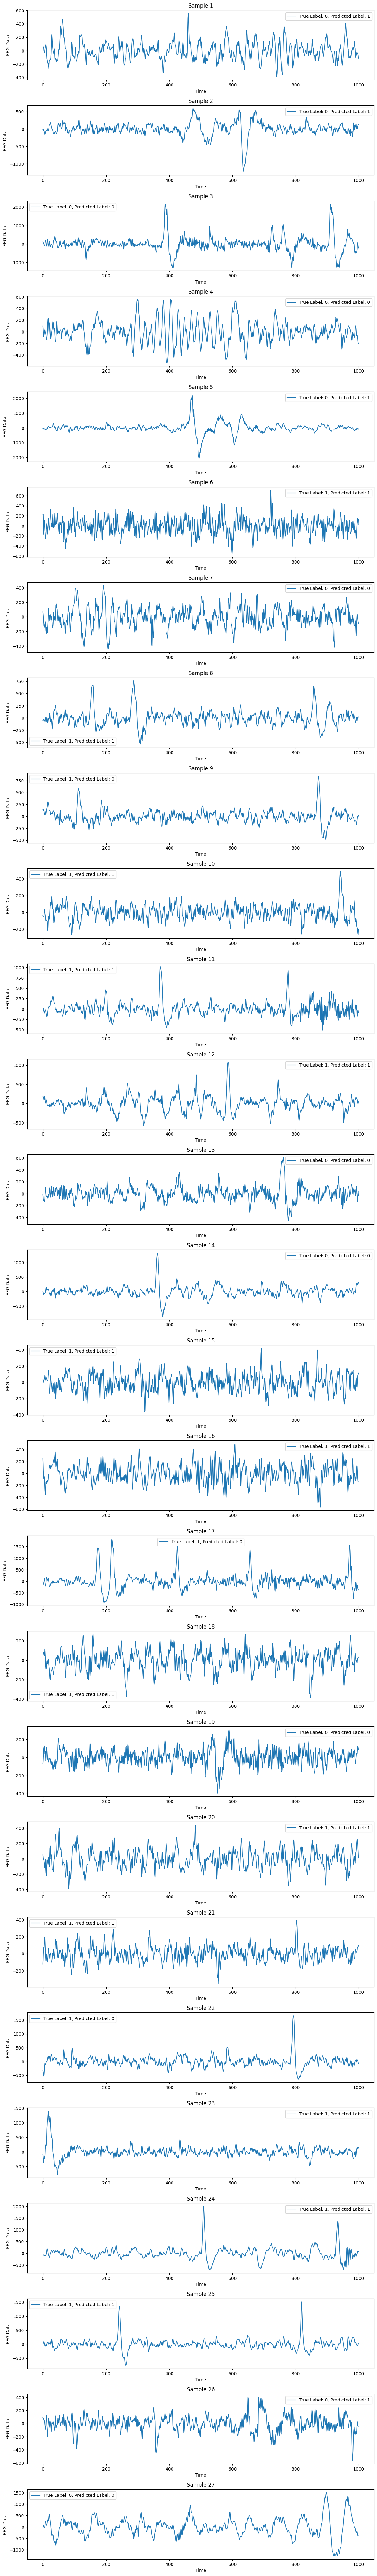

In [43]:
predicted_labels = lstm_model.predict(X_test)
predicted_classes = (predicted_labels > 0.5).astype(int).flatten()

# Plot EEG data with true and predicted labels
num_samples = X_test.shape[0]
num_channels = X_test.shape[1]
num_subplots = num_samples + 1  # Add one for the legend

# Specify the range of indices to plot
start_index = 1000  # Example: start from index 1000
end_index = 2000    # Example: end at index 2000

plt.figure(figsize=(12, 3 * num_subplots))
for i in range(num_samples):
    plt.subplot(num_subplots, 1, i + 1)
    # Flatten the EEG data for plotting
    flattened_data = X_test[i].flatten()[start_index:end_index]
    plt.plot(flattened_data, label=f'True Label: {y_test[i]}, Predicted Label: {predicted_classes[i]}')
    plt.xlabel('Time')
    plt.ylabel('EEG Data')
    plt.title(f'Sample {i + 1}')
    plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


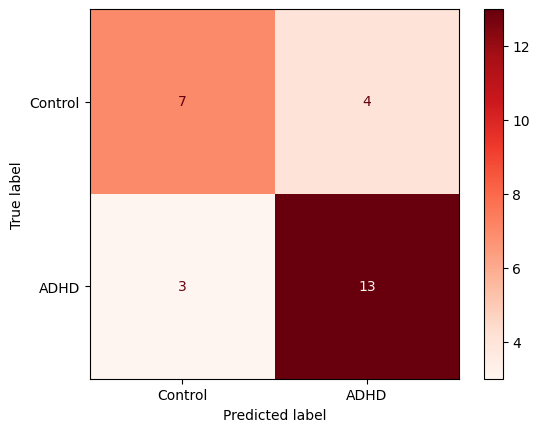

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os
import glob

# Make predictions
y_pred = lstm_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Control', 'ADHD'])
disp.plot(cmap=plt.cm.Reds)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


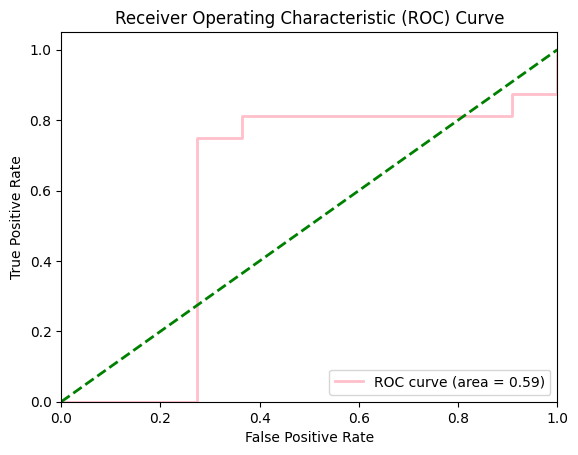

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import os
import glob

# Make predictions
y_pred_prob = lstm_model.predict(X_test)
y_pred_classes = (y_pred_prob > 0.5).astype(int).flatten()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()